In [2]:
import json
import os

import geopandas
import shapely.ops
from shapely.ops import unary_union
from dotenv import load_dotenv

from lib.bus import *
from lib.geometry import *
from lib.mapbox import *

load_dotenv()

True

In [3]:
KAIT_BUS_STOPS = [
    BusStop(name='下川入', group='神奈川中央交通（株）', routes=['厚07', '厚66'], geometry=Geometry(type='Point', lat=35.497950457559874, long=139.34599077213161)),
    BusStop(name='才戸橋', group='神奈川中央交通（株）', routes=['厚07', '厚66'], geometry=Geometry(type='Point', lat=35.49687634897616, long=139.34302500822187)),
    BusStop(name='あつぎ郷土博物館', group='神奈川中央交通（株）', routes=['厚07'], geometry=Geometry(type='Point', lat=35.4956265951361, long=139.35050123448605)),
    BusStop(name='棚沢', group='神奈川中央交通（株）', routes=['厚07'], geometry=Geometry(type='Point', lat=35.495061215065974, long=139.34039997472757)),
    BusStop(name='鳶尾一丁目', group='神奈川中央交通（株）', routes=['厚89', '厚108'], geometry=Geometry(type='Point', lat=35.49173778318636, long=139.33349193609862)),
    BusStop(name='鳶尾団地', group='神奈川中央交通（株）', routes=['厚06', '厚11', '厚12', '厚13', '厚14', '厚89'], geometry=Geometry(type='Point', lat=35.49145989117122, long=139.3273095719953)),
    BusStop(name='鳶尾小学校入口', group='神奈川中央交通（株）', routes=['厚89', '厚108'], geometry=Geometry(type='Point', lat=35.491367211644025, long=139.33112818858217)),
    BusStop(name='下谷', group='神奈川中央交通（株）', routes=['厚07'], geometry=Geometry(type='Point', lat=35.491313284311396, long=139.33997372710792)),
    BusStop(name='西四ツ谷', group='神奈川中央交通（株）', routes=['厚89', '厚108'], geometry=Geometry(type='Point', lat=35.490668882923174, long=139.33900213365808)),
    BusStop(name='鳶尾団地東', group='神奈川中央交通（株）', routes=['厚89', '厚108'], geometry=Geometry(type='Point', lat=35.49013633262482, long=139.33528667044158)),
    BusStop(name='リコー前', group='神奈川中央交通（株）', routes=['厚07', '厚89', '厚108'], geometry=Geometry(type='Point', lat=35.488409168018435, long=139.34024105427488)),
    BusStop(name='神奈川工科大学', group='神奈川中央交通（株）', routes=['厚67'], geometry=Geometry(type='Point', lat=35.48634079963154, long=139.34069452271203)),
    BusStop(name='神奈川工科大学前', group='神奈川中央交通（株）', routes=['厚07', '厚67', '厚89'], geometry=Geometry(type='Point', lat=35.48517315672544, long=139.34089918555708)),
    BusStop(name='子中', group='神奈川中央交通（株）', routes=['厚07', '厚67', '厚89'], geometry=Geometry(type='Point', lat=35.4812944384439, long=139.3414442848584)),
    BusStop(name='荻野新宿', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚10', '厚11', '厚12', '厚14', '厚67', '厚89', '厚94', '愛24'], geometry=Geometry(type='Point', lat=35.47836920363273, long=139.3413764169757)),
    BusStop(name='宿原入口', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚09', '厚10', '厚11', '厚12', '厚14', '厚66', '厚67', '厚89', '厚94', '愛24'], geometry=Geometry(type='Point', lat=35.47471759024211, long=139.34480002642337)),
    BusStop(name='糀屋前', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚10', '厚11', '厚12', '厚14', '厚66', '厚67', '厚89', '厚94', '愛24'], geometry=Geometry(type='Point', lat=35.47265682444741, long=139.34684124224515)),
    BusStop(name='松蓮寺', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚08', '厚10', '厚11', '厚12', '厚14', '厚66', '厚67', '厚89', '厚94', '愛24'], geometry=Geometry(type='Point', lat=35.46952843837568, long=139.34961486418683)),
    BusStop(name='妻田薬師', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚08', '厚10', '厚11', '厚12', '厚14', '厚66', '厚67', '厚89', '厚94'], geometry=Geometry(type='Point', lat=35.464991649342274, long=139.3555005666611)),
    BusStop(name='中村入口', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚08', '厚10', '厚11', '厚12', '厚14', '厚66', '厚67', '厚89', '厚94'], geometry=Geometry(type='Point', lat=35.462093939821806, long=139.35728413656733)),
    BusStop(name='妻田', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚08', '厚09', '厚10', '厚11', '厚12', '厚14', '厚66', '厚67', '厚80', '厚81', '厚89', '厚94'], geometry=Geometry(type='Point', lat=35.458362155044874, long=139.35936410777592)),
    BusStop(name='妻田', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚08', '厚10', '厚11', '厚12', '厚14', '厚66', '厚67', '厚89', '厚94'], geometry=Geometry(type='Point', lat=35.45832575018045, long=139.35869332803207)),
    BusStop(name='三家入口', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚08', '厚09', '厚10', '厚11', '厚12', '厚14', '厚66', '厚67', '厚80', '厚81', '厚89', '厚94'], geometry=Geometry(type='Point', lat=35.454379500450564, long=139.35948452528763)),
    BusStop(name='木売場', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚08', '厚09', '厚10', '厚11', '厚12', '厚14', '厚66', '厚67', '厚80', '厚81', '厚89', '厚94'], geometry=Geometry(type='Point', lat=35.452251666660736, long=139.35988677922978)),
    BusStop(name='市立病院前', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚08', '厚09', '厚10', '厚11', '厚12', '厚14', '厚16', '厚19', '厚20', '厚21', '厚66', '厚67', '厚80', '厚81', '厚89', '厚94', '厚108'], geometry=Geometry(type='Point', lat=35.44890064103176, long=139.36073955828502)),
    BusStop(name='税務署入口', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚08', '厚09', '厚10', '厚11', '厚12', '厚14', '厚66', '厚67', '厚80', '厚81', '厚89', '厚94', '厚108'], geometry=Geometry(type='Point', lat=35.44617843502462, long=139.36107930508555)),
    BusStop(name='市役所入口', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚08', '厚09', '厚10', '厚11', '厚12', '厚14', '厚25', '厚26', '厚27', '厚32', '厚33', '厚34', '厚38', '厚39', '厚46', '厚47', '厚48', '厚66', '厚67', '厚80', '厚81', '厚89', '厚94', '厚95', '厚97', '厚108'], geometry=Geometry(type='Point', lat=35.44238272839834, long=139.3614095355229)),
    BusStop(name='あつぎ大通り', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚08', '厚09', '厚10', '厚11', '厚12', '厚14', '厚25', '厚26', '厚32', '厚33', '厚34', '厚38', '厚39', '厚46', '厚47', '厚48', '厚66', '厚67', '厚80', '厚81', '厚89', '厚94', '厚95', '厚97', '厚108'], geometry=Geometry(type='Point', lat=35.441651435648886, long=139.36235307148507)),
    BusStop(name='厚木バスセンター', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚08', '厚09', '厚10', '厚12', '厚13', '厚25', '厚26', '厚27', '厚32', '厚33', '厚34', '厚38', '厚39', '厚43', '厚44', '厚45', '厚46', '厚47', '厚48', '厚59', '厚60', '厚61', '厚62', '厚63', '厚64', '厚66', '厚67', '厚74', '厚76', '厚79', '厚80', '厚81', '厚89', '厚94', '厚95', '厚96', '厚97', '厚101', '厚105'], geometry=Geometry(type='Point', lat=35.44105937264755, long=139.36698914169125)),
    BusStop(name='本厚木駅', group='神奈川中央交通（株）', routes=['厚01', '厚02', '厚03', '厚04', '厚05', '厚06', '厚07', '厚08', '厚09', '厚10', '厚11', '厚12', '厚13', '厚14', '厚16', '厚17', '厚18', '厚19', '厚20', '厚21', '厚22', '厚25', '厚26', '厚27', '厚39', '厚43', '厚44', '厚47', '厚48', '厚61', '厚66', '厚67', '厚80', '厚81', '厚89', '厚94', '厚95', '厚97', '厚101', '厚108'], geometry=Geometry(type='Point', lat=35.44020746686651, long=139.36467038338796)),
]

KAIT_BUS_STOPS_WALKING_AREAS = [
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.343991, 35.51524], [139.343195, 35.513746], [139.341991, 35.513269], [139.340991, 35.51407], [139.339991, 35.513302], [139.336991, 35.513979], [139.336028, 35.512913], [139.334424, 35.512517], [139.333991, 35.51184], [139.331991, 35.511405], [139.330881, 35.51195], [139.330142, 35.5108], [139.329991, 35.505824], [139.329364, 35.509324], [139.328991, 35.509598], [139.327735, 35.50895], [139.327348, 35.50795], [139.328206, 35.50695], [139.327259, 35.50595], [139.328303, 35.504263], [139.329991, 35.504077], [139.330182, 35.503142], [139.330829, 35.50295], [139.330749, 35.50195], [139.331469, 35.50095], [139.331196, 35.499156], [139.333795, 35.499146], [139.333935, 35.500007], [139.334991, 35.500016], [139.335049, 35.49795], [139.33413, 35.497811], [139.333991, 35.49687], [139.331991, 35.496835], [139.329991, 35.498447], [139.329475, 35.49795], [139.329448, 35.495408], [139.331106, 35.49495], [139.329379, 35.494562], [139.329265, 35.493225], [139.330164, 35.49195], [139.328991, 35.491929], [139.327882, 35.491059], [139.326991, 35.487656], [139.328691, 35.48595], [139.328842, 35.48495], [139.329991, 35.483476], [139.331031, 35.482991], [139.33168, 35.48164], [139.334991, 35.482106], [139.337523, 35.479483], [139.339991, 35.479562], [139.340991, 35.478153], [139.344222, 35.47972], [139.344589, 35.48095], [139.345991, 35.482155], [139.346316, 35.480625], [139.345667, 35.47995], [139.346991, 35.479475], [139.348119, 35.480079], [139.351115, 35.477826], [139.353991, 35.478832], [139.354991, 35.478492], [139.356991, 35.479256], [139.35733, 35.48029], [139.356722, 35.480681], [139.356776, 35.481165], [139.358049, 35.480892], [139.358759, 35.482182], [139.359302, 35.481261], [139.360152, 35.481111], [139.361991, 35.479529], [139.363651, 35.48195], [139.362733, 35.482693], [139.363365, 35.48495], [139.365034, 35.48695], [139.363991, 35.487777], [139.36273, 35.48795], [139.363991, 35.488372], [139.36425, 35.48995], [139.364991, 35.49103], [139.365991, 35.491481], [139.366508, 35.49295], [139.364817, 35.49395], [139.36479, 35.49495], [139.366064, 35.49595], [139.365991, 35.497724], [139.364152, 35.500112], [139.363991, 35.501569], [139.361737, 35.50295], [139.361991, 35.50355], [139.362931, 35.50395], [139.36292, 35.50495], [139.361676, 35.50695], [139.362488, 35.50895], [139.362008, 35.51095], [139.360991, 35.510654], [139.358991, 35.511294], [139.355991, 35.510623], [139.354991, 35.511556], [139.354049, 35.510892], [139.352366, 35.510576], [139.351991, 35.509806], [139.351714, 35.510674], [139.350808, 35.51095], [139.3505, 35.51246], [139.349779, 35.512738], [139.348991, 35.514113], [139.348365, 35.51195], [139.349154, 35.511114], [139.349136, 35.50995], [139.348199, 35.509742], [139.348052, 35.50889], [139.346991, 35.508867], [139.346764, 35.510723], [139.345835, 35.511106], [139.345829, 35.512112], [139.346748, 35.51395], [139.345991, 35.514158], [139.344816, 35.513775], [139.343991, 35.51524]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.348991, 35.508203], [139.344784, 35.508744], [139.343991, 35.508488], [139.342393, 35.50695], [139.341991, 35.505964], [139.341674, 35.506634], [139.339991, 35.507206], [139.338812, 35.50613], [139.336276, 35.505665], [139.333991, 35.506444], [139.331811, 35.506131], [139.33176, 35.50472], [139.332936, 35.50295], [139.332771, 35.500731], [139.335127, 35.49995], [139.3351, 35.497842], [139.332996, 35.49595], [139.335184, 35.49495], [139.334934, 35.49295], [139.336102, 35.489062], [139.336991, 35.48882], [139.338165, 35.489125], [139.338749, 35.487709], [139.339991, 35.486383], [139.340991, 35.486342], [139.341991, 35.487511], [139.345991, 35.486417], [139.346956, 35.484915], [139.348991, 35.484704], [139.349991, 35.485335], [139.351991, 35.485312], [139.352374, 35.48595], [139.350837, 35.487796], [139.350648, 35.489608], [139.349867, 35.48995], [139.349991, 35.491034], [139.350179, 35.490139], [139.351101, 35.48995], [139.351263, 35.488223], [139.352086, 35.488046], [139.35232, 35.487279], [139.354128, 35.487088], [139.355645, 35.485605], [139.356991, 35.48531], [139.357686, 35.48595], [139.35818, 35.48995], [139.35758, 35.49095], [139.358058, 35.494018], [139.35777, 35.494729], [139.356982, 35.49496], [139.358718, 35.49695], [139.356947, 35.49995], [139.354855, 35.500815], [139.355781, 35.50195], [139.355608, 35.50295], [139.354738, 35.50395], [139.354991, 35.505764], [139.354511, 35.50543], [139.353592, 35.505551], [139.351991, 35.507055], [139.350719, 35.507222], [139.349869, 35.506829], [139.349834, 35.50795], [139.348991, 35.508203]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.347991, 35.503981], [139.346991, 35.504641], [139.345991, 35.504034], [139.343991, 35.504416], [139.342991, 35.50331], [139.341991, 35.503838], [139.338991, 35.502542], [139.338533, 35.50195], [139.338717, 35.500677], [139.342128, 35.49895], [139.340991, 35.498524], [139.339216, 35.499176], [139.338574, 35.49895], [139.338539, 35.49795], [139.340208, 35.49695], [139.33899, 35.495951], [139.338884, 35.49495], [139.339935, 35.493895], [139.340991, 35.49432], [139.341991, 35.494051], [139.344991, 35.491658], [139.347991, 35.492118], [139.348428, 35.492514], [139.348367, 35.493327], [139.347755, 35.493715], [139.347991, 35.495082], [139.348327, 35.494287], [139.349207, 35.49395], [139.349677, 35.491636], [139.350991, 35.491297], [139.351991, 35.492545], [139.353146, 35.49295], [139.354546, 35.49495], [139.355072, 35.49795], [139.354289, 35.498249], [139.354088, 35.499048], [139.353352, 35.499312], [139.352492, 35.500452], [139.352054, 35.502014], [139.347991, 35.503981]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.350025, 35.511924], [139.349311, 35.509876], [139.348346, 35.509556], [139.348025, 35.508762], [139.346946, 35.508797], [139.346657, 35.510508], [139.345779, 35.510876], [139.345343, 35.512195], [139.344074, 35.512827], [139.344025, 35.511873], [139.343318, 35.51217], [139.341916, 35.511985], [139.340025, 35.511203], [139.338025, 35.511741], [139.334025, 35.509326], [139.332771, 35.509131], [139.332321, 35.50858], [139.331025, 35.509689], [139.330303, 35.508598], [139.330025, 35.506781], [139.329808, 35.509876], [139.329025, 35.511635], [139.328025, 35.512276], [139.326766, 35.510876], [139.326284, 35.508876], [139.327147, 35.507998], [139.327276, 35.505127], [139.328096, 35.504948], [139.328228, 35.50408], [139.330135, 35.503766], [139.330164, 35.502738], [139.328463, 35.501876], [139.331025, 35.501312], [139.331173, 35.499024], [139.333882, 35.499019], [139.333982, 35.499919], [139.33497, 35.499931], [139.33512, 35.498971], [139.33607, 35.498876], [139.33512, 35.498781], [139.335025, 35.497821], [139.333145, 35.497756], [139.333067, 35.496834], [139.332025, 35.496796], [139.331806, 35.497657], [139.330938, 35.49779], [139.330678, 35.49853], [139.328025, 35.499546], [139.327452, 35.49845], [139.327738, 35.496876], [139.328025, 35.496661], [139.329025, 35.497136], [139.32927, 35.496122], [139.330097, 35.495948], [139.330215, 35.495066], [139.331105, 35.494876], [139.329182, 35.494719], [139.326651, 35.493251], [139.32493, 35.492971], [139.324067, 35.488919], [139.324661, 35.488513], [139.324779, 35.48663], [139.326715, 35.483567], [139.328025, 35.482616], [139.329547, 35.482398], [139.329725, 35.481177], [139.32922, 35.480876], [139.329829, 35.47968], [139.331025, 35.479863], [139.332025, 35.47915], [139.334025, 35.47882], [139.336025, 35.477115], [139.338091, 35.476942], [139.340025, 35.476026], [139.341025, 35.474832], [139.342025, 35.475863], [139.344025, 35.476242], [139.345025, 35.477588], [139.347025, 35.476947], [139.348025, 35.477363], [139.351025, 35.476469], [139.352025, 35.475417], [139.353025, 35.475446], [139.355263, 35.476638], [139.358025, 35.477463], [139.359738, 35.479876], [139.359539, 35.481363], [139.362047, 35.482854], [139.361544, 35.484876], [139.361914, 35.486876], [139.361025, 35.487597], [139.360874, 35.488725], [139.35988, 35.488876], [139.361025, 35.489171], [139.362194, 35.490707], [139.361391, 35.491876], [139.363879, 35.492876], [139.363025, 35.493554], [139.359833, 35.493876], [139.363025, 35.494259], [139.363864, 35.496876], [139.363607, 35.497876], [139.363025, 35.498265], [139.361197, 35.497704], [139.359837, 35.497876], [139.361758, 35.498876], [139.360717, 35.499876], [139.361749, 35.500876], [139.360205, 35.504876], [139.359903, 35.508754], [139.356243, 35.509094], [139.354629, 35.50948], [139.353508, 35.510359], [139.350821, 35.510672], [139.350025, 35.511924]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.347025, 35.506898], [139.346025, 35.507063], [139.342025, 35.505175], [139.340025, 35.505363], [139.338758, 35.503876], [139.338025, 35.503664], [139.337473, 35.504325], [139.335025, 35.505323], [139.332025, 35.504455], [139.330025, 35.505473], [139.329649, 35.504876], [139.330734, 35.503585], [139.332372, 35.502876], [139.331843, 35.501876], [139.331777, 35.500124], [139.33131, 35.499876], [139.331548, 35.499399], [139.333025, 35.499127], [139.333907, 35.499995], [139.335025, 35.499987], [139.335205, 35.499057], [139.336105, 35.498876], [139.335206, 35.498696], [139.335025, 35.497754], [139.333327, 35.497575], [139.333025, 35.496667], [139.331262, 35.495876], [139.332025, 35.493901], [139.332672, 35.49523], [139.335136, 35.494876], [139.335025, 35.493674], [139.334025, 35.494347], [139.333655, 35.493876], [139.332782, 35.489876], [139.333233, 35.487084], [139.335765, 35.486616], [139.336025, 35.486051], [139.337025, 35.48624], [139.33767, 35.484876], [139.339025, 35.483859], [139.340025, 35.48391], [139.341025, 35.483153], [139.344025, 35.485501], [139.345025, 35.484871], [139.347025, 35.484991], [139.348486, 35.483338], [139.350135, 35.482766], [139.351739, 35.483163], [139.352928, 35.483974], [139.35334, 35.484876], [139.351611, 35.487462], [139.350909, 35.48776], [139.350743, 35.489595], [139.349943, 35.489795], [139.349959, 35.490943], [139.350301, 35.490153], [139.351199, 35.489876], [139.351526, 35.488377], [139.353241, 35.488092], [139.353632, 35.487484], [139.354512, 35.48739], [139.355103, 35.487798], [139.355322, 35.488876], [139.356876, 35.489876], [139.357298, 35.493876], [139.356592, 35.494876], [139.356458, 35.497876], [139.35288, 35.500876], [139.352882, 35.502733], [139.352353, 35.502876], [139.352587, 35.503876], [139.351025, 35.505302], [139.347642, 35.505876], [139.347025, 35.506898]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.347025, 35.502621], [139.346292, 35.501609], [139.34574, 35.501592], [139.345025, 35.502452], [139.344025, 35.502275], [139.342025, 35.501172], [139.341025, 35.501163], [139.340398, 35.500503], [139.339025, 35.500407], [139.337025, 35.501421], [139.336203, 35.500876], [139.335936, 35.499876], [139.336432, 35.498876], [139.335959, 35.497876], [139.337882, 35.491876], [139.340025, 35.490988], [139.341614, 35.492287], [139.342402, 35.492253], [139.346025, 35.48888], [139.349191, 35.491711], [139.348699, 35.494203], [139.350025, 35.494106], [139.352538, 35.496876], [139.352221, 35.499876], [139.351746, 35.500597], [139.351025, 35.500951], [139.349751, 35.500602], [139.347025, 35.502621]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.349501, 35.512767], [139.348841, 35.510627], [139.349501, 35.509498], [139.346409, 35.509535], [139.346103, 35.511228], [139.345199, 35.511627], [139.344501, 35.513329], [139.34367, 35.511457], [139.342501, 35.512084], [139.341501, 35.511753], [139.341716, 35.510412], [139.340612, 35.509516], [139.338501, 35.509823], [139.333888, 35.50724], [139.331459, 35.507584], [139.330501, 35.508279], [139.330186, 35.506311], [139.330683, 35.505445], [139.329611, 35.504627], [139.331123, 35.504249], [139.331547, 35.503673], [139.331931, 35.500057], [139.334596, 35.499627], [139.334578, 35.49755], [139.332854, 35.497274], [139.332646, 35.496481], [139.331503, 35.495627], [139.331283, 35.494409], [139.331501, 35.493933], [139.333293, 35.494835], [139.335603, 35.494627], [139.333554, 35.493627], [139.333335, 35.491627], [139.332621, 35.490627], [139.333041, 35.489627], [139.332547, 35.488627], [139.334208, 35.486333], [139.336346, 35.486471], [139.338296, 35.484627], [139.339501, 35.483916], [139.340744, 35.48387], [139.341501, 35.483255], [139.342813, 35.484315], [139.344169, 35.484627], [139.344083, 35.485627], [139.34324, 35.486627], [139.344501, 35.486802], [139.344762, 35.484627], [139.346714, 35.484413], [139.347407, 35.484721], [139.347621, 35.483747], [139.348501, 35.482991], [139.349501, 35.483785], [139.350501, 35.482477], [139.355667, 35.483461], [139.358501, 35.482709], [139.36059, 35.480715], [139.360793, 35.479918], [139.361616, 35.479741], [139.36203, 35.478155], [139.363501, 35.477031], [139.36642, 35.483708], [139.368253, 35.485874], [139.370691, 35.486627], [139.368204, 35.487627], [139.369254, 35.488874], [139.369238, 35.49089], [139.36982, 35.491627], [139.369348, 35.493473], [139.368501, 35.493707], [139.367238, 35.495364], [139.367192, 35.497627], [139.366347, 35.498627], [139.366745, 35.501627], [139.367662, 35.502627], [139.361454, 35.507579], [139.361955, 35.509627], [139.361282, 35.510407], [139.359501, 35.510681], [139.357501, 35.510139], [139.356501, 35.510606], [139.355501, 35.510255], [139.354501, 35.510674], [139.353781, 35.510347], [139.351501, 35.510426], [139.349501, 35.512767]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.351501, 35.506683], [139.348501, 35.507196], [139.346284, 35.505844], [139.343501, 35.505122], [139.342501, 35.504459], [139.340501, 35.504543], [139.338501, 35.503115], [139.337628, 35.503753], [139.336351, 35.503627], [139.337555, 35.501573], [139.336501, 35.501348], [139.335848, 35.499627], [139.335913, 35.498627], [139.336642, 35.497627], [139.336576, 35.495627], [139.337624, 35.493749], [139.337889, 35.492015], [139.339501, 35.49097], [139.341501, 35.492772], [139.342889, 35.492015], [139.344501, 35.489606], [139.346501, 35.488625], [139.347501, 35.489304], [139.349627, 35.489501], [139.349146, 35.490271], [139.349501, 35.491914], [139.34963, 35.490755], [139.350545, 35.490671], [139.350643, 35.489768], [139.35158, 35.489627], [139.351683, 35.487809], [139.353566, 35.487691], [139.353717, 35.486843], [139.354579, 35.486704], [139.354769, 35.485894], [139.356955, 35.48508], [139.357465, 35.483591], [139.358376, 35.483501], [139.358501, 35.483093], [139.359501, 35.483164], [139.360119, 35.483627], [139.360301, 35.485627], [139.360901, 35.486627], [139.360661, 35.487786], [139.359489, 35.488614], [139.359612, 35.489515], [139.361657, 35.49047], [139.361457, 35.491627], [139.363129, 35.492627], [139.362034, 35.49316], [139.359501, 35.493407], [139.359335, 35.494793], [139.360501, 35.494011], [139.362501, 35.494184], [139.363082, 35.494627], [139.362405, 35.495723], [139.363556, 35.496681], [139.362501, 35.497996], [139.361756, 35.497371], [139.360384, 35.49751], [139.360501, 35.498204], [139.361162, 35.498627], [139.360203, 35.499627], [139.36052, 35.500627], [139.359255, 35.50138], [139.358605, 35.50273], [139.35467, 35.504795], [139.354368, 35.505494], [139.352501, 35.505492], [139.351501, 35.506683]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.347501, 35.502655], [139.346501, 35.501143], [139.342997, 35.499627], [139.342599, 35.496627], [139.344501, 35.495703], [139.345567, 35.496627], [139.346501, 35.496802], [139.346826, 35.495952], [139.348576, 35.494701], [139.348625, 35.493627], [139.350065, 35.492627], [139.349862, 35.490987], [139.350631, 35.490756], [139.352501, 35.488634], [139.354501, 35.488595], [139.356501, 35.490476], [139.357208, 35.493627], [139.356123, 35.495627], [139.35702, 35.496627], [139.356891, 35.497017], [139.354907, 35.499033], [139.351909, 35.501035], [139.351501, 35.502114], [139.349532, 35.502596], [139.348501, 35.501297], [139.347501, 35.502655]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.3284, 35.511964], [139.327186, 35.511061], [139.327075, 35.510061], [139.326157, 35.508818], [139.326748, 35.507409], [139.327498, 35.507159], [139.327648, 35.504309], [139.329484, 35.504061], [139.329693, 35.503061], [139.328796, 35.502061], [139.329057, 35.501061], [139.326541, 35.500061], [139.327595, 35.499061], [139.32679, 35.498671], [139.326125, 35.496336], [139.3224, 35.495682], [139.321416, 35.495061], [139.320903, 35.494061], [139.321616, 35.493061], [139.32103, 35.492061], [139.320969, 35.489061], [139.321136, 35.486061], [139.321911, 35.483572], [139.3244, 35.481619], [139.3274, 35.481514], [139.329798, 35.478459], [139.3314, 35.47825], [139.3324, 35.47733], [139.333856, 35.477061], [139.33499, 35.475651], [139.3377, 35.474361], [139.339342, 35.472004], [139.3414, 35.471269], [139.3424, 35.471302], [139.3434, 35.472452], [139.3466, 35.472861], [139.349885, 35.477061], [139.3504, 35.477213], [139.3524, 35.476215], [139.3534, 35.477314], [139.355052, 35.477409], [139.358261, 35.479061], [139.357124, 35.480061], [139.3574, 35.480474], [139.3584, 35.480177], [139.358987, 35.481061], [139.357212, 35.483061], [139.359502, 35.483959], [139.359946, 35.487061], [139.359512, 35.488173], [139.358188, 35.488849], [139.358375, 35.491086], [139.359655, 35.491806], [139.360375, 35.493061], [139.359204, 35.493865], [139.3594, 35.494729], [139.36092, 35.495541], [139.361675, 35.497061], [139.359153, 35.498815], [139.359228, 35.499889], [139.358591, 35.501061], [139.358881, 35.503061], [139.357404, 35.504065], [139.357053, 35.506061], [139.357501, 35.507162], [139.3534, 35.507528], [139.3524, 35.506871], [139.351565, 35.509226], [139.350876, 35.509537], [139.3494, 35.509665], [139.348563, 35.508898], [139.3474, 35.508877], [139.3454, 35.510684], [139.3444, 35.510426], [139.3434, 35.510714], [139.342833, 35.510628], [139.341458, 35.509061], [139.3394, 35.509575], [139.3384, 35.509391], [139.3374, 35.508162], [139.336158, 35.508303], [139.334526, 35.506935], [139.333841, 35.507502], [139.3324, 35.507418], [139.3304, 35.507935], [139.3284, 35.511964]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.3474, 35.505563], [139.34413, 35.505331], [139.342871, 35.50459], [139.3424, 35.503796], [139.341646, 35.504308], [139.3404, 35.50443], [139.3384, 35.503309], [139.3354, 35.502956], [139.334793, 35.504454], [139.331893, 35.504554], [139.3304, 35.505534], [139.329757, 35.505061], [139.329927, 35.504061], [139.331099, 35.50376], [139.331742, 35.503061], [139.3321, 35.501061], [139.331582, 35.500061], [139.331764, 35.499425], [139.3324, 35.499243], [139.333036, 35.499425], [139.333292, 35.500169], [139.3344, 35.500172], [139.334572, 35.499234], [139.335477, 35.499061], [139.33458, 35.498881], [139.3344, 35.496972], [139.330055, 35.497061], [139.329803, 35.496061], [139.331212, 35.494061], [139.330237, 35.493224], [139.330105, 35.492061], [139.328793, 35.490668], [139.328744, 35.489406], [139.329399, 35.489061], [139.328611, 35.48885], [139.328015, 35.488061], [139.3294, 35.486851], [139.329984, 35.484645], [139.3324, 35.482468], [139.335676, 35.483337], [139.336207, 35.481868], [139.3374, 35.480625], [139.3384, 35.480084], [139.3404, 35.480589], [139.3414, 35.479363], [139.3444, 35.481188], [139.345374, 35.483061], [139.345244, 35.484218], [139.3464, 35.483568], [139.3474, 35.484515], [139.3484, 35.483888], [139.3504, 35.483398], [139.350834, 35.483627], [139.351816, 35.484645], [139.35201, 35.486061], [139.35121, 35.486872], [139.350915, 35.488576], [139.35028, 35.488941], [139.350116, 35.490777], [139.34933, 35.491131], [139.35054, 35.491202], [139.350969, 35.48963], [139.3524, 35.488874], [139.3534, 35.490442], [139.354518, 35.490943], [139.3564, 35.494062], [139.356562, 35.496223], [139.355626, 35.498287], [139.352138, 35.501799], [139.3514, 35.503546], [139.3484, 35.504512], [139.3474, 35.505563]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.3384, 35.501082], [139.3364, 35.501259], [139.3354, 35.500825], [139.335027, 35.500061], [139.335744, 35.499061], [139.33431, 35.495972], [139.335555, 35.495216], [139.335245, 35.493061], [139.3355, 35.492061], [139.336465, 35.491061], [139.336449, 35.49011], [139.338614, 35.489276], [139.339336, 35.487997], [139.3404, 35.487188], [139.341128, 35.488333], [139.3414, 35.491248], [139.342183, 35.489845], [139.3434, 35.488973], [139.344197, 35.490264], [139.3464, 35.490013], [139.3474, 35.491003], [139.348067, 35.494061], [139.34712, 35.495061], [139.347109, 35.496352], [139.3484, 35.496083], [139.348992, 35.496469], [139.349731, 35.497061], [139.349694, 35.498061], [139.349189, 35.499061], [139.3474, 35.500154], [139.3464, 35.499635], [139.3454, 35.499957], [139.343911, 35.499551], [139.343403, 35.499061], [139.343783, 35.498061], [139.3434, 35.497934], [139.343398, 35.49906], [139.341283, 35.498944], [139.3384, 35.501082]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.328492, 35.507022], [139.328144, 35.50539], [139.329492, 35.504025], [139.330824, 35.50407], [139.331501, 35.502738], [139.331492, 35.501232], [139.328116, 35.501114], [139.327304, 35.500549], [139.326492, 35.5014], [139.324492, 35.501258], [139.323727, 35.501973], [139.322146, 35.502392], [139.321492, 35.503308], [139.317269, 35.502961], [139.316739, 35.502738], [139.316731, 35.501499], [139.31439, 35.50084], [139.312492, 35.501013], [139.312033, 35.500738], [139.311319, 35.499738], [139.310769, 35.497015], [139.311868, 35.496114], [139.312558, 35.494672], [139.309817, 35.493738], [139.311042, 35.492288], [139.312706, 35.491738], [139.311066, 35.491163], [139.310385, 35.489631], [139.310842, 35.489088], [139.312492, 35.489022], [139.313341, 35.489889], [139.315492, 35.489852], [139.315721, 35.488967], [139.316605, 35.488738], [139.315733, 35.488497], [139.315492, 35.487605], [139.31384, 35.48739], [139.312743, 35.485738], [139.313075, 35.484321], [139.313492, 35.484113], [139.314492, 35.484565], [139.31566, 35.483906], [139.316218, 35.481738], [139.316045, 35.480291], [139.316656, 35.479738], [139.315831, 35.478738], [139.31701, 35.477738], [139.317545, 35.477685], [139.31791, 35.47832], [139.319492, 35.479085], [139.320492, 35.478011], [139.321492, 35.477989], [139.32312, 35.47911], [139.323382, 35.479848], [139.32421, 35.48002], [139.324418, 35.480812], [139.327492, 35.480835], [139.327656, 35.479902], [139.329538, 35.479784], [139.329638, 35.478884], [139.330541, 35.478787], [139.330646, 35.477891], [139.333546, 35.477792], [139.333713, 35.475959], [139.334625, 35.475738], [139.334889, 35.474135], [139.335852, 35.473738], [139.337089, 35.472335], [139.338492, 35.471668], [139.339492, 35.471963], [139.340492, 35.471411], [139.342492, 35.471351], [139.344492, 35.473375], [139.345492, 35.4728], [139.34629, 35.47294], [139.347048, 35.474738], [139.348309, 35.475738], [139.349418, 35.477738], [139.351821, 35.479738], [139.352318, 35.480911], [139.35473, 35.482738], [139.354712, 35.483958], [139.353941, 35.485186], [139.351382, 35.487628], [139.351168, 35.488414], [139.35041, 35.488656], [139.350272, 35.490518], [139.349429, 35.490675], [139.349409, 35.491738], [139.350949, 35.491281], [139.353763, 35.493467], [139.355139, 35.496091], [139.355413, 35.497738], [139.352854, 35.5001], [139.351492, 35.502522], [139.349171, 35.503417], [139.347522, 35.504768], [139.346492, 35.504056], [139.343492, 35.504471], [139.340492, 35.503334], [139.338492, 35.502019], [139.338311, 35.502557], [139.337389, 35.502635], [139.33706, 35.503306], [139.335492, 35.503427], [139.334492, 35.504309], [139.332095, 35.504341], [139.331719, 35.504965], [139.329041, 35.506287], [139.328492, 35.507022]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.336492, 35.502755], [139.334986, 35.502738], [139.334268, 35.501961], [139.33392, 35.500738], [139.334916, 35.499162], [139.335654, 35.498738], [139.334853, 35.498376], [139.334597, 35.497633], [139.332791, 35.497439], [139.332492, 35.496616], [139.33212, 35.497365], [139.330492, 35.498245], [139.32965, 35.49758], [139.329901, 35.496146], [139.330609, 35.495855], [139.330547, 35.494683], [139.329432, 35.494678], [139.329199, 35.495445], [139.327914, 35.496159], [139.326492, 35.49602], [139.325492, 35.49681], [139.324492, 35.496738], [139.323492, 35.497859], [139.321492, 35.498714], [139.319492, 35.497782], [139.319341, 35.496738], [139.317363, 35.495866], [139.317106, 35.494124], [139.317088, 35.490738], [139.318158, 35.488738], [139.317958, 35.486738], [139.318921, 35.486167], [139.319492, 35.485096], [139.320868, 35.484738], [139.320542, 35.482738], [139.321492, 35.48232], [139.323492, 35.482576], [139.324595, 35.481841], [139.326492, 35.482138], [139.327968, 35.481738], [139.328134, 35.48038], [139.329644, 35.47989], [139.331046, 35.478292], [139.334448, 35.477694], [139.335492, 35.478187], [139.338981, 35.478249], [139.340492, 35.47892], [139.342492, 35.481095], [139.343708, 35.481522], [139.345039, 35.484191], [139.346603, 35.484738], [139.346285, 35.485944], [139.347492, 35.485858], [139.348627, 35.488602], [139.348316, 35.489738], [139.349045, 35.490738], [139.348978, 35.492738], [139.348282, 35.493527], [139.348126, 35.494738], [139.346271, 35.495738], [139.346033, 35.496738], [139.346492, 35.49789], [139.345492, 35.498453], [139.341492, 35.4983], [139.339927, 35.498738], [139.339728, 35.499738], [139.338766, 35.500012], [139.33857, 35.500816], [139.337885, 35.501131], [139.337599, 35.501845], [139.336751, 35.501997], [139.336492, 35.502755]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.337492, 35.495975], [139.336543, 35.494686], [139.333222, 35.494468], [139.332492, 35.494927], [139.331492, 35.494005], [139.331165, 35.494411], [139.329492, 35.494495], [139.327083, 35.493147], [139.325492, 35.493359], [139.324648, 35.492738], [139.324467, 35.489713], [139.326022, 35.489268], [139.327723, 35.486969], [139.328975, 35.486221], [139.330492, 35.484494], [139.331492, 35.485127], [139.333492, 35.484254], [139.334593, 35.484637], [139.335492, 35.485968], [139.336107, 35.484738], [139.336707, 35.484523], [139.339231, 35.487738], [139.338241, 35.488487], [139.338323, 35.488906], [139.340492, 35.488225], [139.340892, 35.488738], [139.34162, 35.491738], [139.340627, 35.492872], [139.339049, 35.493738], [139.338468, 35.495714], [139.337492, 35.495975]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.32031, 35.506101], [139.31831, 35.506351], [139.31331, 35.504459], [139.31231, 35.5049], [139.31131, 35.504643], [139.309381, 35.505389], [139.30831, 35.504029], [139.307602, 35.50246], [139.307852, 35.50046], [139.30854, 35.49946], [139.30831, 35.498316], [139.305774, 35.49646], [139.306566, 35.49446], [139.30572, 35.49346], [139.305853, 35.493004], [139.30731, 35.491856], [139.308157, 35.492612], [139.310182, 35.492587], [139.310523, 35.491673], [139.313383, 35.49146], [139.310516, 35.491254], [139.31031, 35.490336], [139.309989, 35.491139], [139.30863, 35.491139], [139.307493, 35.489277], [139.306211, 35.488559], [139.306107, 35.487258], [139.306657, 35.486808], [139.30831, 35.48674], [139.309161, 35.487609], [139.311016, 35.487753], [139.311227, 35.488543], [139.312094, 35.488675], [139.31231, 35.489553], [139.317345, 35.489495], [139.316437, 35.489332], [139.316373, 35.488396], [139.315436, 35.488334], [139.315353, 35.487416], [139.313474, 35.487295], [139.31337, 35.4864], [139.312502, 35.486267], [139.312542, 35.483692], [139.313395, 35.483545], [139.313607, 35.482758], [139.3164, 35.48246], [139.315499, 35.48227], [139.31431, 35.480834], [139.312192, 35.480578], [139.312219, 35.47746], [139.31331, 35.475498], [139.313659, 35.47611], [139.31531, 35.476071], [139.31631, 35.476836], [139.318126, 35.476644], [139.31831, 35.477026], [139.32031, 35.476706], [139.321214, 35.477555], [139.322076, 35.477693], [139.322239, 35.478531], [139.323114, 35.478655], [139.323249, 35.47952], [139.32414, 35.479629], [139.324259, 35.480511], [139.326149, 35.48062], [139.326265, 35.481505], [139.32731, 35.481519], [139.32748, 35.480631], [139.328362, 35.480512], [139.328457, 35.479607], [139.329357, 35.479507], [139.32946, 35.47861], [139.33131, 35.478538], [139.331478, 35.477628], [139.333368, 35.477518], [139.333506, 35.476656], [139.33443, 35.47646], [139.334563, 35.47446], [139.336522, 35.473672], [139.338543, 35.472226], [139.338786, 35.47346], [139.33931, 35.473843], [139.34118, 35.473589], [139.341514, 35.474256], [139.344718, 35.475051], [139.34534, 35.476429], [139.346445, 35.47746], [139.344976, 35.479126], [139.345927, 35.48046], [139.345037, 35.48146], [139.347463, 35.48346], [139.349405, 35.484365], [139.349296, 35.486473], [139.350048, 35.486198], [139.350484, 35.48646], [139.350689, 35.48746], [139.350062, 35.488213], [139.349991, 35.49046], [139.349132, 35.49146], [139.349607, 35.492757], [139.348209, 35.493359], [139.348042, 35.495193], [139.347199, 35.495349], [139.346141, 35.49646], [139.347559, 35.49671], [139.34831, 35.495932], [139.349182, 35.49646], [139.349891, 35.49746], [139.349354, 35.49946], [139.34831, 35.499024], [139.34731, 35.500206], [139.34531, 35.499459], [139.34431, 35.500156], [139.343136, 35.49946], [139.343706, 35.49846], [139.341816, 35.49846], [139.33962, 35.500771], [139.337959, 35.50111], [139.33631, 35.503271], [139.335151, 35.503301], [139.33431, 35.504166], [139.332814, 35.503955], [139.331798, 35.501972], [139.33031, 35.50236], [139.32951, 35.50226], [139.32931, 35.501371], [139.32631, 35.501335], [139.326051, 35.502201], [139.325094, 35.50246], [139.32431, 35.504199], [139.323447, 35.503322], [139.322234, 35.503384], [139.322048, 35.504199], [139.321086, 35.50446], [139.32031, 35.506101]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.32231, 35.501662], [139.318823, 35.501946], [139.31831, 35.501675], [139.317883, 35.50046], [139.318526, 35.499676], [139.31831, 35.4991], [139.317657, 35.499808], [139.313921, 35.498848], [139.312937, 35.49746], [139.313208, 35.494562], [139.312487, 35.49346], [139.313582, 35.49146], [139.312457, 35.49046], [139.31331, 35.489908], [139.317419, 35.48946], [139.316663, 35.489106], [139.316484, 35.488286], [139.315652, 35.488117], [139.31531, 35.487204], [139.313954, 35.486815], [139.313872, 35.486023], [139.31441, 35.48556], [139.31531, 35.485716], [139.31631, 35.484804], [139.316137, 35.483288], [139.317246, 35.48246], [139.317169, 35.48146], [139.31831, 35.480317], [139.319556, 35.480706], [139.32031, 35.479752], [139.321778, 35.479991], [139.32231, 35.480474], [139.32331, 35.480017], [139.326173, 35.481597], [139.327442, 35.481593], [139.329844, 35.478994], [139.33131, 35.478816], [139.33231, 35.477986], [139.33431, 35.47796], [139.335103, 35.47846], [139.335896, 35.479873], [139.33731, 35.47982], [139.338056, 35.48046], [139.33831, 35.482844], [139.342838, 35.48746], [139.342792, 35.488942], [139.34231, 35.489099], [139.341637, 35.488133], [139.341127, 35.488278], [139.341206, 35.490564], [139.34231, 35.489615], [139.34323, 35.48954], [139.343675, 35.491094], [139.34427, 35.49146], [139.344096, 35.492246], [139.339155, 35.497305], [139.33731, 35.498309], [139.33631, 35.497707], [139.335481, 35.49646], [139.336525, 35.49546], [139.335405, 35.494364], [139.334189, 35.49446], [139.333858, 35.495912], [139.334826, 35.49646], [139.333712, 35.496862], [139.333009, 35.496761], [139.332569, 35.4962], [139.33131, 35.496475], [139.330979, 35.49546], [139.328258, 35.495409], [139.328222, 35.496548], [139.328953, 35.496817], [139.329131, 35.49746], [139.328716, 35.49846], [139.329004, 35.499765], [139.329688, 35.50046], [139.32831, 35.50091], [139.32742, 35.498349], [139.32631, 35.498135], [139.324406, 35.50046], [139.32231, 35.501662]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.32331, 35.496731], [139.32131, 35.496916], [139.32031, 35.496582], [139.319176, 35.494593], [139.319268, 35.492418], [139.32046, 35.49146], [139.319883, 35.49046], [139.319442, 35.48746], [139.32031, 35.486239], [139.32131, 35.485718], [139.32331, 35.485214], [139.32531, 35.485466], [139.32631, 35.484981], [139.329942, 35.48446], [139.331089, 35.485681], [139.33245, 35.486319], [139.332702, 35.487067], [139.336638, 35.49046], [139.336218, 35.49246], [139.33431, 35.493622], [139.33331, 35.492988], [139.332494, 35.493644], [139.330917, 35.494067], [139.329949, 35.495099], [139.328088, 35.495238], [139.32731, 35.495814], [139.32631, 35.495299], [139.32331, 35.496731]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.330128, 35.505759], [139.329666, 35.505367], [139.329796, 35.504035], [139.331128, 35.504051], [139.332314, 35.503367], [139.331128, 35.501519], [139.329358, 35.501137], [139.327128, 35.500931], [139.326605, 35.501844], [139.324604, 35.502843], [139.323128, 35.503046], [139.322128, 35.504035], [139.319128, 35.504317], [139.316128, 35.504013], [139.31461, 35.503367], [139.314384, 35.502367], [139.313128, 35.501161], [139.3123, 35.502539], [139.310995, 35.5025], [139.310438, 35.500367], [139.309587, 35.499367], [139.310138, 35.498367], [139.309417, 35.497367], [139.311258, 35.496497], [139.311566, 35.495367], [139.310128, 35.494865], [139.309128, 35.495547], [139.308618, 35.495367], [139.308638, 35.494367], [139.307861, 35.493367], [139.308589, 35.492828], [139.310128, 35.492612], [139.310517, 35.491756], [139.313238, 35.491367], [139.308867, 35.490629], [139.309405, 35.489367], [139.308919, 35.488367], [139.310128, 35.487753], [139.310951, 35.488545], [139.312734, 35.488762], [139.313128, 35.489498], [139.317175, 35.489414], [139.316313, 35.489182], [139.316186, 35.48831], [139.315306, 35.48819], [139.315128, 35.487259], [139.313381, 35.487115], [139.313232, 35.486264], [139.312507, 35.485988], [139.312318, 35.485367], [139.312507, 35.484746], [139.313356, 35.484367], [139.313757, 35.482996], [139.31625, 35.482367], [139.315494, 35.482001], [139.315326, 35.480367], [139.314039, 35.479456], [139.313704, 35.478367], [139.315128, 35.476922], [139.315248, 35.477248], [139.317391, 35.477104], [139.319128, 35.478682], [139.320128, 35.477021], [139.322014, 35.478482], [139.322859, 35.478637], [139.323049, 35.479447], [139.323912, 35.479583], [139.324063, 35.480432], [139.324947, 35.480549], [139.325077, 35.481419], [139.32718, 35.481419], [139.327297, 35.480536], [139.32818, 35.480419], [139.328274, 35.479513], [139.329174, 35.479413], [139.329273, 35.478512], [139.331128, 35.478442], [139.331286, 35.477525], [139.333183, 35.477422], [139.333314, 35.476553], [139.334237, 35.476367], [139.334437, 35.474676], [139.335236, 35.474475], [139.337571, 35.47181], [139.339128, 35.471288], [139.339898, 35.472597], [139.341128, 35.472082], [139.342302, 35.473193], [139.344128, 35.473782], [139.345691, 35.473804], [139.349564, 35.480367], [139.349513, 35.481367], [139.350128, 35.481982], [139.351128, 35.481915], [139.351856, 35.482367], [139.352137, 35.483359], [139.352778, 35.483717], [139.352538, 35.485777], [139.351937, 35.486176], [139.350695, 35.488934], [139.350025, 35.489264], [139.349863, 35.491102], [139.349028, 35.491367], [139.349886, 35.49161], [139.350128, 35.493067], [139.352737, 35.495758], [139.353333, 35.497367], [139.353212, 35.499367], [139.351238, 35.501477], [139.350128, 35.501522], [139.347128, 35.503418], [139.346128, 35.502493], [139.345128, 35.503338], [139.339321, 35.501175], [139.33762, 35.502859], [139.335812, 35.503051], [139.333128, 35.505167], [139.330847, 35.505086], [139.330128, 35.505759]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.337128, 35.501479], [139.336128, 35.501482], [139.335544, 35.500951], [139.335128, 35.497158], [139.330928, 35.497167], [139.330128, 35.497677], [139.329703, 35.497367], [139.329672, 35.495911], [139.331187, 35.495309], [139.328062, 35.495301], [139.327517, 35.496756], [139.325128, 35.497291], [139.324476, 35.498715], [139.321128, 35.499943], [139.320128, 35.499432], [139.319405, 35.49809], [139.318128, 35.497222], [139.316066, 35.497367], [139.315328, 35.495167], [139.315571, 35.491367], [139.31589, 35.490129], [139.317128, 35.489654], [139.317378, 35.489118], [139.317233, 35.488367], [139.315922, 35.487367], [139.316126, 35.486367], [139.318588, 35.484367], [139.318553, 35.482367], [139.319128, 35.481683], [139.320128, 35.481939], [139.321128, 35.480924], [139.322128, 35.481441], [139.327357, 35.481596], [139.329635, 35.478875], [139.331128, 35.478668], [139.332128, 35.477742], [139.334967, 35.477528], [139.339128, 35.479118], [139.341128, 35.48188], [139.344094, 35.484402], [139.346462, 35.488367], [139.346599, 35.489367], [139.347525, 35.490367], [139.34746, 35.493699], [139.346998, 35.494367], [139.345674, 35.494913], [139.345128, 35.49584], [139.343932, 35.496367], [139.344444, 35.497367], [139.338111, 35.49935], [139.337128, 35.501479]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.334128, 35.495016], [139.333128, 35.494533], [139.330937, 35.495176], [139.328346, 35.495149], [139.327128, 35.493939], [139.324805, 35.494691], [139.322973, 35.494367], [139.32261, 35.489367], [139.323064, 35.488367], [139.325128, 35.487806], [139.32549, 35.486367], [139.329128, 35.483958], [139.332128, 35.483985], [139.334555, 35.48594], [139.336128, 35.486196], [139.336999, 35.488367], [139.338128, 35.488955], [139.338708, 35.489787], [139.340426, 35.490367], [139.340126, 35.491365], [139.337128, 35.494147], [139.336715, 35.493781], [139.335562, 35.493801], [139.334128, 35.495016]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.328974, 35.509715], [139.32771, 35.509313], [139.32733, 35.507313], [139.328149, 35.506313], [139.327241, 35.505313], [139.327974, 35.50458], [139.329064, 35.504404], [139.329226, 35.503566], [139.330806, 35.503313], [139.331257, 35.500596], [139.332029, 35.500369], [139.332128, 35.499468], [139.335011, 35.499351], [139.335023, 35.497313], [139.331896, 35.497236], [139.331644, 35.497983], [139.330854, 35.498194], [139.330492, 35.498831], [139.328127, 35.49916], [139.327974, 35.49722], [139.328974, 35.497626], [139.329241, 35.49558], [139.330974, 35.495235], [139.328909, 35.495248], [139.328639, 35.495978], [139.327316, 35.496656], [139.325974, 35.495884], [139.321974, 35.498494], [139.319974, 35.497716], [139.318974, 35.496336], [139.31804, 35.496247], [139.317201, 35.494313], [139.317765, 35.492313], [139.316746, 35.491313], [139.317384, 35.490723], [139.318307, 35.488313], [139.317714, 35.487313], [139.318666, 35.486313], [139.318065, 35.485313], [139.319231, 35.484313], [139.318104, 35.483313], [139.318209, 35.481549], [139.319092, 35.481195], [139.319974, 35.481691], [139.320694, 35.480313], [139.321974, 35.480728], [139.322974, 35.479853], [139.324862, 35.481425], [139.327051, 35.48139], [139.32721, 35.480549], [139.328043, 35.480383], [139.328167, 35.479507], [139.329034, 35.479373], [139.329164, 35.478504], [139.330974, 35.47841], [139.33119, 35.477529], [139.333056, 35.477396], [139.33333, 35.47667], [139.334068, 35.476407], [139.334228, 35.475568], [139.335063, 35.475402], [139.33527, 35.474313], [139.336298, 35.473313], [139.335223, 35.471313], [139.337974, 35.469848], [139.33898, 35.47032], [139.338748, 35.468088], [139.339974, 35.467652], [139.340974, 35.468606], [139.342974, 35.467926], [139.344974, 35.468479], [139.345974, 35.469392], [139.349974, 35.469606], [139.350805, 35.471313], [139.350216, 35.472313], [139.352434, 35.473313], [139.352754, 35.474313], [139.353634, 35.474653], [139.355974, 35.476901], [139.357974, 35.476958], [139.359929, 35.479313], [139.358766, 35.482313], [139.357974, 35.483106], [139.356838, 35.483313], [139.357974, 35.484834], [139.359974, 35.484817], [139.360484, 35.486313], [139.359859, 35.486428], [139.358974, 35.485694], [139.356041, 35.486246], [139.35609, 35.485197], [139.353974, 35.485213], [139.35378, 35.48612], [139.352916, 35.486256], [139.352794, 35.487134], [139.351923, 35.487262], [139.351821, 35.488161], [139.350929, 35.488269], [139.350841, 35.48918], [139.349917, 35.489313], [139.349974, 35.491409], [139.350227, 35.489567], [139.351064, 35.489404], [139.351291, 35.488631], [139.352091, 35.488431], [139.352396, 35.487736], [139.354179, 35.487518], [139.354562, 35.486902], [139.355974, 35.486429], [139.35641, 35.487877], [139.357529, 35.489313], [139.35719, 35.490313], [139.357656, 35.493313], [139.356825, 35.494313], [139.357274, 35.497313], [139.356967, 35.498306], [139.355886, 35.499226], [139.354968, 35.499308], [139.354731, 35.500071], [139.353797, 35.500313], [139.353788, 35.501128], [139.353225, 35.501313], [139.353904, 35.503313], [139.353607, 35.504313], [139.351974, 35.505945], [139.349107, 35.506447], [139.348108, 35.507448], [139.345974, 35.507769], [139.344485, 35.507313], [139.341974, 35.505061], [139.341407, 35.505747], [139.339974, 35.506159], [139.337864, 35.504313], [139.336974, 35.504161], [139.336996, 35.505335], [139.333974, 35.505819], [139.333054, 35.505313], [139.330894, 35.505233], [139.329799, 35.506313], [139.329545, 35.508885], [139.328974, 35.509715]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.332974, 35.504327], [139.332595, 35.504313], [139.332909, 35.504248], [139.332314, 35.500313], [139.332974, 35.499654], [139.335059, 35.499399], [139.335041, 35.497246], [139.332375, 35.496912], [139.330974, 35.494948], [139.328974, 35.495041], [139.327027, 35.49326], [139.325092, 35.493195], [139.323957, 35.48933], [139.324724, 35.488313], [139.324663, 35.486313], [139.326285, 35.485313], [139.325974, 35.483987], [139.328412, 35.482752], [139.329461, 35.481313], [139.32953, 35.479869], [139.331761, 35.4791], [139.333974, 35.478876], [139.335974, 35.477246], [139.337974, 35.477117], [139.339974, 35.476331], [139.340119, 35.475459], [139.340974, 35.474803], [139.341974, 35.475746], [139.343974, 35.475975], [139.344778, 35.477509], [139.345974, 35.477359], [139.348472, 35.480313], [139.347804, 35.481143], [139.347974, 35.481596], [139.351694, 35.482593], [139.352992, 35.483313], [139.353278, 35.484313], [139.352563, 35.485902], [139.350577, 35.488916], [139.349843, 35.489313], [139.349861, 35.492426], [139.352523, 35.494764], [139.353928, 35.497313], [139.353694, 35.498313], [139.351974, 35.501086], [139.350974, 35.501699], [139.349974, 35.501743], [139.346974, 35.503684], [139.345974, 35.502741], [139.344974, 35.503555], [139.339153, 35.501134], [139.337333, 35.502673], [139.335974, 35.502746], [139.333974, 35.504184], [139.332974, 35.504327]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.340974, 35.49865], [139.340139, 35.498313], [139.340068, 35.497219], [139.339596, 35.497935], [139.33794, 35.498347], [139.33628, 35.497007], [139.336012, 35.496313], [139.336459, 35.495313], [139.333605, 35.492313], [139.332674, 35.490313], [139.333032, 35.489313], [139.33264, 35.488313], [139.333974, 35.48627], [139.336914, 35.486254], [139.337974, 35.484822], [139.340974, 35.483085], [139.343268, 35.485019], [139.343956, 35.486331], [139.346366, 35.487921], [139.348026, 35.490365], [139.347524, 35.493864], [139.345573, 35.494913], [139.344974, 35.496131], [139.343854, 35.496313], [139.344682, 35.496605], [139.345025, 35.497313], [139.341696, 35.498036], [139.340974, 35.49865]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.329002, 35.508087], [139.32754, 35.507669], [139.327506, 35.505669], [139.328466, 35.504133], [139.330002, 35.503831], [139.33133, 35.502669], [139.331218, 35.498885], [139.332786, 35.498885], [139.333002, 35.499758], [139.335002, 35.499737], [139.335057, 35.497669], [139.333194, 35.497477], [139.333055, 35.496616], [139.332002, 35.496589], [139.331783, 35.49745], [139.330914, 35.49758], [139.330656, 35.498323], [139.329396, 35.499063], [139.328002, 35.499281], [139.328002, 35.49701], [139.329002, 35.496964], [139.329262, 35.495929], [139.330078, 35.495745], [139.33021, 35.494877], [139.331002, 35.494612], [139.32996, 35.494627], [139.329866, 35.495532], [139.327921, 35.495588], [139.327832, 35.496499], [139.326002, 35.496267], [139.323903, 35.49857], [139.322002, 35.499291], [139.320002, 35.498918], [139.319002, 35.497299], [139.316516, 35.496669], [139.31586, 35.494811], [139.31615, 35.491669], [139.315792, 35.490669], [139.317592, 35.488669], [139.31724, 35.487431], [139.316412, 35.486669], [139.317065, 35.483732], [139.317002, 35.480518], [139.318002, 35.480024], [139.320002, 35.482071], [139.320443, 35.481669], [139.320002, 35.480936], [139.3196, 35.481071], [139.320002, 35.479133], [139.320694, 35.479977], [139.322144, 35.479527], [139.323572, 35.480099], [139.324002, 35.480821], [139.328002, 35.480765], [139.328165, 35.479832], [139.329053, 35.479719], [139.329155, 35.478822], [139.331002, 35.478748], [139.331169, 35.477836], [139.333059, 35.477725], [139.333395, 35.476061], [139.336284, 35.473669], [139.336654, 35.472669], [139.33555, 35.471669], [139.338002, 35.46993], [139.339002, 35.470053], [139.339002, 35.468084], [139.341002, 35.468405], [139.342509, 35.468162], [139.344932, 35.468739], [139.346051, 35.46962], [139.348002, 35.469514], [139.349747, 35.469924], [139.350633, 35.472039], [139.354307, 35.475669], [139.354819, 35.477669], [139.356002, 35.478361], [139.358002, 35.478406], [139.358121, 35.479669], [139.359312, 35.480669], [139.356818, 35.483669], [139.358145, 35.484526], [139.3583, 35.485371], [139.359352, 35.485669], [139.357838, 35.485833], [139.357002, 35.48513], [139.356002, 35.485425], [139.355002, 35.48453], [139.354759, 35.485425], [139.353925, 35.485592], [139.353755, 35.486422], [139.352002, 35.486583], [139.351851, 35.487518], [139.350955, 35.487622], [139.350855, 35.489522], [139.349941, 35.489669], [139.349882, 35.491548], [139.348949, 35.491669], [139.35008, 35.491747], [139.350301, 35.489968], [139.351113, 35.48978], [139.351389, 35.489056], [139.352157, 35.488824], [139.353698, 35.487365], [139.354855, 35.487669], [139.355002, 35.488804], [139.356786, 35.489669], [139.357155, 35.491669], [139.357285, 35.493669], [139.356529, 35.494669], [139.356486, 35.497669], [139.355522, 35.499189], [139.352917, 35.501583], [139.352807, 35.502474], [139.352277, 35.502669], [139.35239, 35.503669], [139.351312, 35.504979], [139.347553, 35.505669], [139.347044, 35.506711], [139.346002, 35.506893], [139.34404, 35.505631], [139.342002, 35.504979], [139.340904, 35.505767], [139.338002, 35.503431], [139.336158, 35.504825], [139.335002, 35.505076], [139.334002, 35.504617], [139.333649, 35.505316], [139.330694, 35.50536], [139.329002, 35.508087]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.334002, 35.50372], [139.333458, 35.503669], [139.333002, 35.502949], [139.332909, 35.500669], [139.333456, 35.500123], [139.335114, 35.49978], [139.335084, 35.497587], [139.334267, 35.497404], [139.334002, 35.496555], [139.331665, 35.496006], [139.331133, 35.494538], [139.329887, 35.494554], [139.329002, 35.495454], [139.328002, 35.494386], [139.326065, 35.493731], [139.323815, 35.493856], [139.322946, 35.491669], [139.323348, 35.487669], [139.323002, 35.485645], [139.323276, 35.484943], [139.324095, 35.484669], [139.324948, 35.482615], [139.327002, 35.482576], [139.328796, 35.481669], [139.328441, 35.480669], [139.329552, 35.479219], [139.331002, 35.479051], [139.332425, 35.478092], [139.335002, 35.478278], [139.336002, 35.477421], [139.339696, 35.476362], [139.341002, 35.475087], [139.342002, 35.47593], [139.344002, 35.476515], [139.34499, 35.477669], [139.345786, 35.477885], [139.347795, 35.479669], [139.348222, 35.480669], [139.347646, 35.481313], [139.347759, 35.481912], [139.35013, 35.482541], [139.352193, 35.484669], [139.352186, 35.485853], [139.350844, 35.487511], [139.350484, 35.489151], [139.349881, 35.489548], [139.349698, 35.491365], [139.34889, 35.491669], [139.349697, 35.491974], [139.349852, 35.493519], [139.34928, 35.493391], [139.348791, 35.49388], [139.350002, 35.494191], [139.352105, 35.496566], [139.351969, 35.499669], [139.351675, 35.500341], [139.347002, 35.502285], [139.345087, 35.501754], [139.344002, 35.502107], [139.340289, 35.500382], [139.339448, 35.501115], [139.337678, 35.501345], [139.337002, 35.502936], [139.335339, 35.503006], [139.334002, 35.50372]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.343002, 35.496726], [139.341922, 35.497589], [139.341002, 35.497486], [139.340002, 35.4964], [139.339002, 35.497037], [139.338002, 35.497005], [139.337002, 35.496086], [139.336246, 35.494425], [139.334002, 35.493855], [139.333541, 35.49313], [139.332139, 35.492669], [139.330704, 35.488669], [139.333091, 35.484758], [139.334002, 35.484883], [139.335002, 35.486071], [139.337002, 35.484845], [139.338002, 35.485181], [139.341002, 35.483418], [139.343346, 35.485325], [139.343785, 35.486887], [139.345002, 35.487158], [139.345568, 35.488669], [139.344875, 35.489541], [139.345002, 35.49023], [139.346002, 35.48999], [139.346636, 35.490669], [139.34685, 35.492669], [139.346002, 35.49424], [139.344317, 35.494984], [139.344002, 35.49589], [139.342962, 35.495629], [139.343002, 35.496726]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.328287, 35.507281], [139.328152, 35.505002], [139.329853, 35.503703], [139.331518, 35.503136], [139.331534, 35.499384], [139.334053, 35.49937], [139.334287, 35.500223], [139.334423, 35.499273], [139.33533, 35.49918], [139.334419, 35.499004], [139.334327, 35.497096], [139.331226, 35.497076], [139.331013, 35.498863], [139.329151, 35.499001], [139.329286, 35.500136], [139.328474, 35.500323], [139.327639, 35.500136], [139.327523, 35.4979], [139.326287, 35.498007], [139.325019, 35.499136], [139.324552, 35.500402], [139.323375, 35.501224], [139.319287, 35.502172], [139.318249, 35.501174], [139.317898, 35.499748], [139.318287, 35.499822], [139.318525, 35.499375], [139.318287, 35.49885], [139.317287, 35.49964], [139.316287, 35.499119], [139.313457, 35.498966], [139.312544, 35.496136], [139.31354, 35.494136], [139.312076, 35.493136], [139.31192, 35.492136], [139.312541, 35.490882], [139.31134, 35.490136], [139.313287, 35.489556], [139.314101, 35.490322], [139.315287, 35.490305], [139.315607, 35.489457], [139.316432, 35.489136], [139.316465, 35.488136], [139.31557, 35.487853], [139.315287, 35.486942], [139.313033, 35.48639], [139.31314, 35.485136], [139.313962, 35.485461], [139.315649, 35.485136], [139.31496, 35.484136], [139.31556, 35.48341], [139.316419, 35.483269], [139.315569, 35.482136], [139.316538, 35.480136], [139.315587, 35.479136], [139.316845, 35.477695], [139.318579, 35.478136], [139.318789, 35.479136], [139.319287, 35.4793], [139.319641, 35.47849], [139.322287, 35.478348], [139.323179, 35.479244], [139.324006, 35.479417], [139.324226, 35.481197], [139.327287, 35.481224], [139.327434, 35.480283], [139.328332, 35.480182], [139.328416, 35.479266], [139.32933, 35.479179], [139.329424, 35.478274], [139.331287, 35.478206], [139.331438, 35.477287], [139.333287, 35.477211], [139.333457, 35.476307], [139.334346, 35.476196], [139.334696, 35.473546], [139.337092, 35.471941], [139.337406, 35.471136], [139.340287, 35.470252], [139.342322, 35.470101], [139.34411, 35.471313], [139.347536, 35.471887], [139.348514, 35.473136], [139.349171, 35.475252], [139.351382, 35.477041], [139.351166, 35.478257], [139.352599, 35.478824], [139.354178, 35.481245], [139.355434, 35.480989], [139.355887, 35.481536], [139.356521, 35.483136], [139.356349, 35.484199], [139.354287, 35.484878], [139.35382, 35.48567], [139.35219, 35.48604], [139.351921, 35.487771], [139.351197, 35.488047], [139.351028, 35.488878], [139.350186, 35.489136], [139.350099, 35.490949], [139.349211, 35.491136], [139.350545, 35.491395], [139.351287, 35.490423], [139.352287, 35.491642], [139.353317, 35.492106], [139.355672, 35.495751], [139.355356, 35.498136], [139.352788, 35.500638], [139.35241, 35.50226], [139.347711, 35.504561], [139.347287, 35.505232], [139.346287, 35.504667], [139.344287, 35.504924], [139.343287, 35.5037], [139.340287, 35.503622], [139.339626, 35.502797], [139.338763, 35.502612], [139.338166, 35.503016], [139.336147, 35.502997], [139.334287, 35.504696], [139.331834, 35.504684], [139.328287, 35.507281]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.337287, 35.502268], [139.335461, 35.50231], [139.335287, 35.503038], [139.334059, 35.502364], [139.33392, 35.501136], [139.334716, 35.499566], [139.335455, 35.499136], [139.334679, 35.498744], [139.334287, 35.496967], [139.330858, 35.496565], [139.330462, 35.496136], [139.331375, 35.495048], [139.329191, 35.495041], [139.328287, 35.495706], [139.325287, 35.495541], [139.322287, 35.496783], [139.320287, 35.496249], [139.319404, 35.495136], [139.318895, 35.493136], [139.319273, 35.492136], [139.318736, 35.489136], [139.319197, 35.488136], [139.31878, 35.487136], [139.321487, 35.484336], [139.321287, 35.483633], [139.320294, 35.483136], [139.321287, 35.482354], [139.325287, 35.481407], [139.326915, 35.481508], [139.327287, 35.481875], [139.328652, 35.479502], [139.329407, 35.479257], [139.329726, 35.478576], [139.331287, 35.478368], [139.331826, 35.477676], [139.333512, 35.477362], [139.334287, 35.476721], [139.335287, 35.476687], [139.336287, 35.477271], [139.339287, 35.476623], [139.340043, 35.47838], [139.340656, 35.478506], [139.341287, 35.477738], [139.342074, 35.479349], [139.344346, 35.480136], [139.345039, 35.482384], [139.345984, 35.483136], [139.345826, 35.483597], [139.348488, 35.484136], [139.349173, 35.486136], [139.348885, 35.489136], [139.349397, 35.492026], [139.347786, 35.494636], [139.346532, 35.495136], [139.346794, 35.496136], [139.345994, 35.497136], [139.346287, 35.497555], [139.347287, 35.49773], [139.347287, 35.498434], [139.345287, 35.498939], [139.344464, 35.497959], [139.342287, 35.497981], [139.341877, 35.498727], [139.339553, 35.499403], [139.337287, 35.502268]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.338287, 35.495741], [139.337287, 35.495923], [139.334382, 35.494136], [139.332287, 35.493522], [139.330287, 35.493829], [139.329164, 35.492259], [139.327753, 35.49167], [139.326117, 35.490136], [139.327192, 35.487041], [139.329733, 35.484136], [139.330287, 35.483745], [139.331287, 35.484018], [139.332287, 35.482884], [139.334287, 35.483121], [139.336182, 35.484241], [139.337287, 35.48315], [139.340356, 35.486067], [139.341787, 35.488136], [139.341055, 35.488904], [139.341089, 35.490136], [139.342409, 35.491136], [139.342471, 35.492136], [139.339394, 35.494136], [139.338287, 35.495741]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.329241, 35.506734], [139.328089, 35.506409], [139.328612, 35.504409], [139.329241, 35.50378], [139.330241, 35.503985], [139.331048, 35.503409], [139.331826, 35.501409], [139.331502, 35.49967], [139.335306, 35.499409], [139.334387, 35.499264], [139.334287, 35.497364], [139.332419, 35.497231], [139.332241, 35.496297], [139.331894, 35.497062], [139.330241, 35.497903], [139.329939, 35.497712], [139.3295, 35.496409], [139.330318, 35.495332], [139.328114, 35.495282], [139.327241, 35.496485], [139.326484, 35.496166], [139.326241, 35.495378], [139.325935, 35.496103], [139.321241, 35.497152], [139.319313, 35.495409], [139.318841, 35.491409], [139.319245, 35.490409], [139.318574, 35.489409], [139.318886, 35.488409], [139.3185, 35.487409], [139.319242, 35.48641], [139.319241, 35.485284], [139.321404, 35.484409], [139.319241, 35.483766], [139.318975, 35.482143], [139.32072, 35.481888], [139.321241, 35.481131], [139.322241, 35.481559], [139.323241, 35.480171], [139.325114, 35.481537], [139.327241, 35.481529], [139.327478, 35.480647], [139.328313, 35.480481], [139.328443, 35.479611], [139.329304, 35.479472], [139.329441, 35.478609], [139.331241, 35.478514], [139.331413, 35.477582], [139.333295, 35.477463], [139.333436, 35.476604], [139.334324, 35.476409], [139.334318, 35.472409], [139.332342, 35.471409], [139.334185, 35.470409], [139.334989, 35.469157], [139.336553, 35.468721], [139.336466, 35.466634], [139.337241, 35.465171], [139.339241, 35.465723], [139.340241, 35.465259], [139.341241, 35.465745], [139.342433, 35.465217], [139.344241, 35.465981], [139.345241, 35.465577], [139.347241, 35.46689], [139.348241, 35.466502], [139.351241, 35.466789], [139.352241, 35.467496], [139.355241, 35.473064], [139.359366, 35.476284], [139.360807, 35.478409], [139.360899, 35.479409], [139.359853, 35.481021], [139.359126, 35.481294], [139.358945, 35.482113], [139.358151, 35.482319], [139.357132, 35.483409], [139.358016, 35.484634], [139.359241, 35.484794], [139.360241, 35.483633], [139.361241, 35.483312], [139.361305, 35.484473], [139.36056, 35.485409], [139.361742, 35.486409], [139.360241, 35.486671], [139.359241, 35.485762], [139.357241, 35.485943], [139.356241, 35.485296], [139.354241, 35.485325], [139.354079, 35.486247], [139.352241, 35.4863], [139.352108, 35.487276], [139.351199, 35.487367], [139.351088, 35.489256], [139.350183, 35.489409], [139.350118, 35.491287], [139.349188, 35.491409], [139.350349, 35.491518], [139.350733, 35.489901], [139.351845, 35.489013], [139.353241, 35.488585], [139.356693, 35.493409], [139.35652, 35.496688], [139.355827, 35.498409], [139.35205, 35.502218], [139.351594, 35.503762], [139.349622, 35.50479], [139.346989, 35.505157], [139.345241, 35.505903], [139.344241, 35.505753], [139.34258, 35.504409], [139.340979, 35.504671], [139.338241, 35.50296], [139.33689, 35.50376], [139.33518, 35.503348], [139.335013, 35.504181], [139.334084, 35.504252], [139.333241, 35.504989], [139.330824, 35.504992], [139.330241, 35.506157], [139.329241, 35.506734]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.337241, 35.502485], [139.334504, 35.502146], [139.334163, 35.500332], [139.335429, 35.499409], [139.334508, 35.498409], [139.334385, 35.497265], [139.333038, 35.496409], [139.334494, 35.495156], [139.333241, 35.495109], [139.331241, 35.493955], [139.330241, 35.494782], [139.329327, 35.494323], [139.328416, 35.492409], [139.326495, 35.491409], [139.325476, 35.487409], [139.325715, 35.486409], [139.326793, 35.485409], [139.326686, 35.484409], [139.327649, 35.483817], [139.328315, 35.482409], [139.329871, 35.481409], [139.329937, 35.480106], [139.331241, 35.480069], [139.33199, 35.478159], [139.334885, 35.477409], [139.334944, 35.476112], [139.337678, 35.474846], [139.339241, 35.47308], [139.341241, 35.471956], [139.344241, 35.473772], [139.345241, 35.473326], [139.3461, 35.47355], [139.346241, 35.474824], [139.347823, 35.475409], [139.349082, 35.477568], [139.350241, 35.478169], [139.351642, 35.480409], [139.354455, 35.482196], [139.354915, 35.483409], [139.35455, 35.484719], [139.35362, 35.485788], [139.353241, 35.485977], [139.352528, 35.485122], [139.352038, 35.485206], [139.351844, 35.487012], [139.35113, 35.487298], [139.351039, 35.488207], [139.350241, 35.489083], [139.349924, 35.491092], [139.349127, 35.491409], [139.349741, 35.49191], [139.349674, 35.492842], [139.348161, 35.493329], [139.347961, 35.495129], [139.347142, 35.49531], [139.346826, 35.495994], [139.34612, 35.496289], [139.346241, 35.49659], [139.347441, 35.496609], [139.347838, 35.496006], [139.349241, 35.495588], [139.350513, 35.497409], [139.350337, 35.499409], [139.347241, 35.500666], [139.346241, 35.500069], [139.344241, 35.500482], [139.342564, 35.499409], [139.343555, 35.498409], [139.342144, 35.498313], [139.337241, 35.502485]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.341241, 35.496012], [139.338241, 35.495534], [139.336959, 35.493691], [139.336254, 35.493396], [139.334118, 35.489409], [139.333771, 35.487409], [139.334141, 35.486309], [139.335241, 35.486295], [139.335694, 35.485862], [139.336241, 35.483806], [139.337241, 35.483672], [139.336811, 35.482409], [139.337241, 35.481812], [139.338241, 35.48106], [139.340241, 35.481083], [139.341241, 35.480231], [139.34374, 35.481911], [139.344954, 35.483697], [139.345018, 35.484632], [139.346634, 35.485016], [139.34795, 35.486409], [139.34648, 35.491409], [139.345518, 35.491686], [139.343319, 35.493409], [139.341241, 35.496012]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.330695, 35.50536], [139.329875, 35.50516], [139.329801, 35.504341], [139.331341, 35.503987], [139.332084, 35.502731], [139.332011, 35.502024], [139.33102, 35.501341], [139.331245, 35.500891], [139.332037, 35.499683], [139.334755, 35.499402], [139.334746, 35.497289], [139.330695, 35.496773], [139.330187, 35.496341], [139.330695, 35.495216], [139.327764, 35.495271], [139.326695, 35.494796], [139.323695, 35.49568], [139.321695, 35.495244], [139.320999, 35.494341], [139.320953, 35.493341], [139.319888, 35.492341], [139.320417, 35.491341], [139.319923, 35.491113], [139.319079, 35.487341], [139.319661, 35.485341], [139.320923, 35.484341], [139.319168, 35.483341], [139.31917, 35.482341], [139.320695, 35.481607], [139.322695, 35.481412], [139.322889, 35.480536], [139.324144, 35.480892], [139.324555, 35.48148], [139.326695, 35.48146], [139.326904, 35.48055], [139.327756, 35.480402], [139.327869, 35.479516], [139.328749, 35.479395], [139.328862, 35.478508], [139.330695, 35.478426], [139.330839, 35.477485], [139.333738, 35.477384], [139.333845, 35.475491], [139.334744, 35.47539], [139.33479, 35.474245], [139.332371, 35.473341], [139.333695, 35.472715], [139.3338, 35.472235], [139.331314, 35.47196], [139.330695, 35.47231], [139.330043, 35.471341], [139.333024, 35.469671], [139.333503, 35.467149], [139.334587, 35.466341], [139.335898, 35.463544], [139.338695, 35.463823], [139.341695, 35.464699], [139.342695, 35.463768], [139.346695, 35.463835], [139.347695, 35.464595], [139.348695, 35.464438], [139.349695, 35.465379], [139.351695, 35.46468], [139.354445, 35.466341], [139.355251, 35.470341], [139.356798, 35.471238], [139.357414, 35.472621], [139.36019, 35.474845], [139.361365, 35.476671], [139.361445, 35.478341], [139.360562, 35.479209], [139.360401, 35.481048], [139.359609, 35.481255], [139.359466, 35.482112], [139.358625, 35.482271], [139.358692, 35.483338], [139.356638, 35.483397], [139.358692, 35.483343], [139.358693, 35.484341], [139.359695, 35.484927], [139.360361, 35.484341], [139.3602, 35.483835], [139.358701, 35.483341], [139.360695, 35.482608], [139.361475, 35.48356], [139.361359, 35.485677], [139.364037, 35.486341], [139.363695, 35.486755], [139.359695, 35.48689], [139.359035, 35.486], [139.357242, 35.485793], [139.356695, 35.485113], [139.354695, 35.48527], [139.354555, 35.486201], [139.352647, 35.486293], [139.352471, 35.487117], [139.351603, 35.487341], [139.351511, 35.488157], [139.350649, 35.488295], [139.350546, 35.490192], [139.349634, 35.490341], [139.349601, 35.492434], [139.350277, 35.490923], [139.351833, 35.490203], [139.355695, 35.495023], [139.355839, 35.497341], [139.352307, 35.500953], [139.351868, 35.502514], [139.348753, 35.504399], [139.344695, 35.505006], [139.342695, 35.503806], [139.340695, 35.503738], [139.337698, 35.502337], [139.337451, 35.503098], [139.335483, 35.503129], [139.333695, 35.50466], [139.330968, 35.504615], [139.330695, 35.50536]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.336695, 35.501162], [139.335472, 35.500564], [139.335322, 35.498341], [139.334384, 35.496031], [139.334421, 35.495068], [139.335695, 35.494822], [139.335779, 35.494257], [139.333595, 35.494242], [139.331695, 35.493054], [139.330691, 35.493344], [139.330001, 35.492035], [139.327695, 35.48991], [139.326695, 35.489487], [139.326293, 35.487939], [139.326874, 35.486162], [139.326686, 35.484341], [139.328096, 35.482742], [139.32839, 35.480341], [139.329367, 35.479013], [139.330695, 35.478903], [139.331695, 35.477599], [139.334005, 35.477341], [139.334231, 35.475878], [139.337211, 35.473857], [139.338605, 35.471251], [139.341695, 35.470076], [139.343006, 35.470341], [139.344695, 35.471745], [139.346695, 35.471801], [139.347695, 35.47222], [139.350695, 35.476007], [139.351695, 35.476647], [139.352053, 35.477982], [139.354695, 35.480206], [139.356139, 35.480896], [139.357194, 35.482341], [139.356311, 35.483341], [139.356801, 35.484341], [139.355793, 35.484439], [139.353695, 35.486108], [139.351695, 35.486109], [139.351398, 35.487045], [139.35068, 35.487326], [139.350499, 35.489145], [139.34954, 35.490341], [139.349535, 35.492341], [139.348533, 35.493341], [139.348147, 35.494793], [139.346402, 35.496048], [139.346695, 35.496919], [139.347754, 35.497341], [139.347693, 35.498341], [139.345695, 35.498932], [139.3439, 35.498135], [139.341572, 35.498218], [139.341344, 35.49899], [139.339695, 35.499915], [139.337695, 35.499852], [139.336695, 35.501162]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.340695, 35.493611], [139.339695, 35.494189], [139.33826, 35.492776], [139.337056, 35.492341], [139.337195, 35.491341], [139.333912, 35.487341], [139.335729, 35.484341], [139.335224, 35.482811], [139.33563, 35.481276], [139.337695, 35.479182], [139.339749, 35.479287], [139.340319, 35.480341], [139.340817, 35.480463], [139.340926, 35.478572], [139.341695, 35.478022], [139.345292, 35.480341], [139.34441, 35.481341], [139.345695, 35.482869], [139.349086, 35.484341], [139.347538, 35.485184], [139.347762, 35.486341], [139.347105, 35.487341], [139.346878, 35.489525], [139.3454, 35.491046], [139.342695, 35.491847], [139.340695, 35.493611]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.347899, 35.504175], [139.346899, 35.504749], [139.345899, 35.504251], [139.343899, 35.504363], [139.342899, 35.503457], [139.340899, 35.503265], [139.338089, 35.501983], [139.336899, 35.502856], [139.335609, 35.502883], [139.333899, 35.504361], [139.330899, 35.504214], [139.330891, 35.504165], [139.331899, 35.503877], [139.332446, 35.503173], [139.332341, 35.501732], [139.331371, 35.501173], [139.331547, 35.500821], [139.332899, 35.499438], [139.333764, 35.500309], [139.334973, 35.500247], [139.334959, 35.498113], [139.334104, 35.497969], [139.333899, 35.497045], [139.33214, 35.496932], [139.330959, 35.496173], [139.330899, 35.495006], [139.328132, 35.49494], [139.326899, 35.49401], [139.324161, 35.494911], [139.322786, 35.494286], [139.322239, 35.493173], [139.321053, 35.492173], [139.320675, 35.489398], [139.319382, 35.487173], [139.319611, 35.485885], [139.321119, 35.484173], [139.319236, 35.483173], [139.319599, 35.482173], [139.320899, 35.481494], [139.321899, 35.481581], [139.322899, 35.48052], [139.323899, 35.480581], [139.324786, 35.481286], [139.326899, 35.481284], [139.32709, 35.480364], [139.327957, 35.480231], [139.328061, 35.479335], [139.32895, 35.479224], [139.329059, 35.478333], [139.330899, 35.478257], [139.331046, 35.47732], [139.332899, 35.477247], [139.333078, 35.476352], [139.33395, 35.476224], [139.334043, 35.475317], [139.334948, 35.475222], [139.334899, 35.474029], [139.331532, 35.47354], [139.328796, 35.471173], [139.330496, 35.46977], [139.330899, 35.468931], [139.331671, 35.468945], [139.333377, 35.465173], [139.33474, 35.464173], [139.334918, 35.463173], [139.335899, 35.462506], [139.337101, 35.462971], [139.339094, 35.462978], [139.341838, 35.464234], [139.342761, 35.463035], [139.347899, 35.462862], [139.349899, 35.463975], [139.351899, 35.463665], [139.353119, 35.463953], [139.353899, 35.465488], [139.354899, 35.464621], [139.355277, 35.464796], [139.356342, 35.469173], [139.35562, 35.470173], [139.356162, 35.470436], [139.356899, 35.469958], [139.361397, 35.474173], [139.361938, 35.475135], [139.361497, 35.477771], [139.360746, 35.478173], [139.360652, 35.480926], [139.359826, 35.481099], [139.358763, 35.48231], [139.359205, 35.482867], [139.360899, 35.482373], [139.361249, 35.482823], [139.361462, 35.484173], [139.360506, 35.48478], [139.360524, 35.485548], [139.36428, 35.485793], [139.365318, 35.487173], [139.363899, 35.487907], [139.362899, 35.487755], [139.362067, 35.487005], [139.358899, 35.486747], [139.357899, 35.485878], [139.356262, 35.48581], [139.355899, 35.485098], [139.354857, 35.485131], [139.354771, 35.486045], [139.352758, 35.486173], [139.352616, 35.48689], [139.351788, 35.487173], [139.351677, 35.487951], [139.350811, 35.488173], [139.350727, 35.490001], [139.349836, 35.490173], [139.349899, 35.491614], [139.350899, 35.49135], [139.353945, 35.494127], [139.355123, 35.496173], [139.35496, 35.498173], [139.354149, 35.498423], [139.353934, 35.499208], [139.352371, 35.500645], [139.351956, 35.50223], [139.349057, 35.503331], [139.347899, 35.504175]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.338899, 35.499272], [139.337899, 35.498858], [139.336899, 35.499945], [139.33646, 35.499613], [139.335474, 35.497598], [139.335025, 35.494047], [139.331489, 35.493173], [139.330658, 35.491414], [139.329125, 35.490173], [139.329308, 35.489765], [139.327707, 35.489173], [139.327059, 35.488173], [139.327784, 35.487173], [139.326776, 35.484173], [139.327174, 35.483173], [139.328123, 35.482397], [139.328516, 35.47979], [139.329899, 35.478573], [139.330899, 35.478688], [139.331899, 35.47745], [139.333751, 35.477173], [139.334402, 35.475676], [139.336901, 35.474175], [139.337309, 35.473173], [139.337044, 35.472173], [139.339228, 35.470502], [139.340055, 35.469017], [139.342771, 35.469302], [139.344899, 35.470539], [139.348639, 35.471173], [139.348743, 35.472173], [139.35014, 35.473173], [139.350556, 35.474516], [139.353033, 35.476173], [139.352717, 35.477355], [139.354842, 35.478231], [139.355759, 35.479313], [139.356899, 35.47984], [139.358281, 35.482173], [139.356641, 35.483173], [139.356986, 35.485086], [139.357955, 35.485173], [139.356612, 35.485173], [139.355899, 35.484878], [139.354899, 35.484989], [139.354542, 35.485816], [139.351899, 35.485844], [139.350751, 35.487025], [139.348899, 35.492965], [139.347346, 35.49462], [139.345749, 35.495173], [139.346305, 35.498173], [139.345747, 35.498325], [139.345274, 35.497798], [139.344356, 35.497717], [139.341899, 35.497985], [139.341345, 35.498619], [139.338899, 35.499272]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.339899, 35.492908], [139.338652, 35.492173], [139.338142, 35.490931], [139.337182, 35.490173], [139.337358, 35.489715], [139.335879, 35.489173], [139.335078, 35.487173], [139.335325, 35.484173], [139.334754, 35.482318], [139.336899, 35.479094], [139.340019, 35.478293], [139.340899, 35.476618], [139.342956, 35.477116], [139.34648, 35.480173], [139.344715, 35.480989], [139.345899, 35.482461], [139.346899, 35.481539], [139.347318, 35.482754], [139.350454, 35.484173], [139.349899, 35.485209], [139.34774, 35.485014], [139.347608, 35.487173], [139.346608, 35.488173], [139.346533, 35.489173], [139.345066, 35.49034], [139.342851, 35.491222], [139.342276, 35.490796], [139.342145, 35.489173], [139.340802, 35.489076], [139.340705, 35.490367], [139.341498, 35.491173], [139.339899, 35.492908]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.336444, 35.502417], [139.335444, 35.502824], [139.334161, 35.502294], [139.33382, 35.500294], [139.335615, 35.499294], [139.334873, 35.498866], [139.334569, 35.49717], [139.333089, 35.496294], [139.334682, 35.495057], [139.332894, 35.494845], [139.331444, 35.493778], [139.330444, 35.494539], [139.329439, 35.4943], [139.328444, 35.492499], [139.322444, 35.492652], [139.320607, 35.492294], [139.320444, 35.490774], [139.319212, 35.489294], [139.318791, 35.487294], [139.319217, 35.486294], [139.318731, 35.485294], [139.31941, 35.484294], [139.318401, 35.483294], [139.318444, 35.481785], [139.31858, 35.482158], [139.319927, 35.481778], [139.320939, 35.480789], [139.321818, 35.480668], [139.322444, 35.479815], [139.323444, 35.479747], [139.324358, 35.481381], [139.327444, 35.481376], [139.327594, 35.480445], [139.32849, 35.48034], [139.328576, 35.479426], [139.329487, 35.479338], [139.329581, 35.478431], [139.331444, 35.478351], [139.331569, 35.477419], [139.333444, 35.477354], [139.333554, 35.476404], [139.334479, 35.476329], [139.334444, 35.474197], [139.327848, 35.473891], [139.324788, 35.47195], [139.324414, 35.471294], [139.325498, 35.470348], [139.326024, 35.468874], [139.327444, 35.469048], [139.327916, 35.468766], [139.329444, 35.465651], [139.330444, 35.465235], [139.331598, 35.465448], [139.331898, 35.464294], [139.332943, 35.463294], [139.332676, 35.462294], [139.333213, 35.461063], [139.335444, 35.460611], [139.33769, 35.462294], [139.340444, 35.462474], [139.341444, 35.461648], [139.344314, 35.461164], [139.344652, 35.460502], [139.347444, 35.459737], [139.348444, 35.460186], [139.349932, 35.459807], [139.351444, 35.46129], [139.352444, 35.460075], [139.357444, 35.461676], [139.358444, 35.462442], [139.35981, 35.465294], [139.35923, 35.467294], [139.360899, 35.469294], [139.362408, 35.473258], [139.362053, 35.473903], [139.362243, 35.476294], [139.362041, 35.476891], [139.361338, 35.477188], [139.361186, 35.479036], [139.360368, 35.479219], [139.360249, 35.481099], [139.359383, 35.481234], [139.357389, 35.48335], [139.358444, 35.484245], [139.359232, 35.484082], [139.359279, 35.483129], [139.360444, 35.48251], [139.361444, 35.482526], [139.361779, 35.483294], [139.361196, 35.485542], [139.364602, 35.486136], [139.364771, 35.486622], [139.363597, 35.487448], [139.362742, 35.486997], [139.359444, 35.486901], [139.358727, 35.486012], [139.356948, 35.48579], [139.356444, 35.4851], [139.354444, 35.485232], [139.354315, 35.486165], [139.352444, 35.486232], [139.352324, 35.487174], [139.351382, 35.487294], [139.351255, 35.489106], [139.350392, 35.489242], [139.350311, 35.490294], [139.349348, 35.491294], [139.350107, 35.492294], [139.349918, 35.492768], [139.348341, 35.493294], [139.348444, 35.495138], [139.349336, 35.495403], [139.350863, 35.497294], [139.350517, 35.499368], [139.347444, 35.501069], [139.346444, 35.500009], [139.345444, 35.500718], [139.342753, 35.500294], [139.342277, 35.499294], [139.341662, 35.499076], [139.338557, 35.501408], [139.336926, 35.501776], [139.336444, 35.502417]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.342444, 35.495304], [139.341351, 35.496201], [139.338211, 35.495527], [139.336922, 35.493817], [139.336153, 35.493585], [139.334677, 35.491061], [139.332444, 35.490186], [139.329444, 35.48739], [139.328444, 35.487669], [139.326444, 35.486831], [139.325499, 35.484294], [139.32555, 35.482294], [139.327699, 35.481549], [139.329879, 35.47873], [139.331533, 35.478383], [139.331772, 35.477622], [139.333444, 35.47744], [139.333685, 35.476535], [139.334515, 35.476366], [139.334701, 35.472294], [139.332881, 35.471294], [139.334991, 35.470294], [139.336881, 35.468731], [139.337083, 35.468294], [139.336504, 35.467294], [139.337444, 35.465805], [139.338444, 35.466531], [139.340444, 35.465894], [139.341444, 35.466676], [139.342444, 35.46565], [139.345444, 35.466473], [139.347444, 35.467707], [139.348444, 35.467304], [139.349444, 35.467642], [139.350444, 35.467398], [139.351444, 35.467894], [139.355237, 35.474294], [139.354209, 35.475059], [139.354272, 35.475467], [139.355444, 35.475479], [139.35688, 35.476294], [139.358283, 35.479294], [139.357222, 35.480072], [139.357259, 35.48048], [139.358444, 35.480496], [139.358899, 35.481294], [139.357073, 35.483294], [139.357444, 35.484362], [139.354444, 35.485129], [139.354078, 35.485929], [139.352444, 35.486131], [139.352145, 35.486995], [139.351347, 35.487197], [139.351145, 35.487995], [139.350345, 35.488294], [139.349806, 35.489656], [139.348985, 35.489836], [139.34743, 35.49228], [139.343882, 35.493732], [139.342444, 35.495304]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.341444, 35.48845], [139.340444, 35.489155], [139.33987, 35.488869], [139.338675, 35.487064], [139.337444, 35.486652], [139.336489, 35.48525], [139.334826, 35.484913], [139.333453, 35.483294], [139.333405, 35.481334], [139.334761, 35.479294], [139.334825, 35.478294], [139.336064, 35.477294], [139.336488, 35.475338], [139.337444, 35.475349], [139.339444, 35.473359], [139.341444, 35.472627], [139.342081, 35.473658], [139.345565, 35.474174], [139.345722, 35.475294], [139.349944, 35.480294], [139.349272, 35.481467], [139.350747, 35.483294], [139.349709, 35.484559], [139.34897, 35.48482], [139.348444, 35.484884], [139.347444, 35.484053], [139.345325, 35.484175], [139.345444, 35.484684], [139.346444, 35.484821], [139.346567, 35.485417], [139.345444, 35.486119], [139.344243, 35.486093], [139.342898, 35.487748], [139.341444, 35.48845]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.336376, 35.500552], [139.334758, 35.496369], [139.335376, 35.4942], [139.331376, 35.493272], [139.330376, 35.49368], [139.329645, 35.4931], [139.328376, 35.493175], [139.327376, 35.492182], [139.326554, 35.492546], [139.323376, 35.492686], [139.320502, 35.492369], [139.32051, 35.491235], [139.319038, 35.489369], [139.319198, 35.488369], [139.31863, 35.487369], [139.319111, 35.486369], [139.318731, 35.485369], [139.319376, 35.484513], [139.320376, 35.4847], [139.320581, 35.484369], [139.319376, 35.484281], [139.31823, 35.483369], [139.31813, 35.481369], [139.318376, 35.481178], [139.318548, 35.482198], [139.319376, 35.482107], [139.320415, 35.481369], [139.320558, 35.480551], [139.321609, 35.480602], [139.322376, 35.479775], [139.323376, 35.479722], [139.324291, 35.481455], [139.327376, 35.481449], [139.327524, 35.480517], [139.328422, 35.480414], [139.328506, 35.479499], [139.329419, 35.479411], [139.329509, 35.478502], [139.331376, 35.478424], [139.331492, 35.477484], [139.333376, 35.477418], [139.333469, 35.476462], [139.334406, 35.476399], [139.334376, 35.474297], [139.330586, 35.474159], [139.330376, 35.473274], [139.330091, 35.474084], [139.329376, 35.474227], [139.328662, 35.474084], [139.328462, 35.473283], [139.327376, 35.473184], [139.326376, 35.474107], [139.325376, 35.474075], [139.321856, 35.472369], [139.322437, 35.47143], [139.32216, 35.470369], [139.322773, 35.469369], [139.322657, 35.468369], [139.326154, 35.467369], [139.326688, 35.465369], [139.327376, 35.464612], [139.330435, 35.463428], [139.32968, 35.462369], [139.331376, 35.45894], [139.332376, 35.45864], [139.334376, 35.460563], [139.337891, 35.460855], [139.338299, 35.462446], [139.340376, 35.462475], [139.340676, 35.461668], [139.342788, 35.461781], [139.345376, 35.45836], [139.346376, 35.458486], [139.347376, 35.45706], [139.349376, 35.457656], [139.350143, 35.457135], [139.351376, 35.45708], [139.352376, 35.458152], [139.354376, 35.458099], [139.358376, 35.459138], [139.359376, 35.459897], [139.360152, 35.461594], [139.361773, 35.462369], [139.361732, 35.463369], [139.363057, 35.466369], [139.362132, 35.467369], [139.363284, 35.468369], [139.363146, 35.473369], [139.362223, 35.474369], [139.362146, 35.477139], [139.361282, 35.477369], [139.361153, 35.480146], [139.360302, 35.480295], [139.360113, 35.481106], [139.359299, 35.481292], [139.359164, 35.482157], [139.358312, 35.482304], [139.358191, 35.483184], [139.35728, 35.483369], [139.3581, 35.483646], [139.358376, 35.484634], [139.359376, 35.484627], [139.360073, 35.483066], [139.361376, 35.482868], [139.361533, 35.484369], [139.360765, 35.485369], [139.361376, 35.486184], [139.362412, 35.486369], [139.359376, 35.486704], [139.358795, 35.48595], [139.357024, 35.485722], [139.356376, 35.484924], [139.354327, 35.48532], [139.354221, 35.486213], [139.352376, 35.486295], [139.352234, 35.487227], [139.351302, 35.487369], [139.351125, 35.489118], [139.35031, 35.489303], [139.350247, 35.49024], [139.349285, 35.491277], [139.349648, 35.492641], [139.348282, 35.493274], [139.347812, 35.494804], [139.345685, 35.496369], [139.346633, 35.497369], [139.346835, 35.498369], [139.345376, 35.498649], [139.344639, 35.498107], [139.341376, 35.498068], [139.340376, 35.499246], [139.338376, 35.499565], [139.336376, 35.500552]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.341376, 35.492503], [139.339376, 35.493342], [139.336842, 35.489904], [139.335652, 35.489094], [139.334376, 35.489321], [139.330376, 35.487696], [139.328376, 35.48774], [139.327529, 35.487217], [139.326519, 35.487227], [139.325453, 35.484369], [139.325694, 35.483051], [139.325307, 35.4823], [139.327626, 35.481618], [139.329768, 35.478761], [139.331376, 35.478492], [139.331648, 35.477641], [139.333376, 35.477464], [139.33355, 35.476542], [139.334429, 35.476422], [139.334488, 35.474257], [139.332319, 35.473312], [139.334376, 35.472632], [139.33447, 35.472276], [139.331376, 35.472325], [139.330251, 35.471369], [139.331219, 35.470212], [139.332376, 35.47042], [139.333266, 35.469369], [139.333615, 35.468131], [139.33332, 35.467312], [139.334503, 35.466496], [139.334614, 35.465607], [139.336344, 35.463337], [139.341376, 35.464726], [139.343376, 35.463698], [139.344376, 35.463661], [139.350376, 35.465078], [139.351376, 35.464736], [139.353489, 35.465369], [139.354323, 35.466369], [139.354525, 35.468221], [139.355428, 35.469369], [139.355929, 35.471369], [139.355211, 35.472535], [139.355675, 35.472668], [139.356376, 35.472004], [139.359992, 35.477369], [139.358261, 35.478369], [139.358674, 35.479369], [139.357161, 35.480154], [139.357233, 35.482369], [139.356207, 35.4832], [139.355376, 35.484811], [139.354181, 35.485174], [139.353376, 35.486017], [139.352376, 35.486084], [139.350773, 35.487766], [139.349967, 35.48796], [139.349376, 35.488996], [139.347248, 35.489241], [139.346376, 35.490696], [139.342376, 35.491626], [139.341376, 35.492503]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.342376, 35.485462], [139.341376, 35.486059], [139.340761, 35.485984], [139.337595, 35.484151], [139.333795, 35.482951], [139.333223, 35.482369], [139.332826, 35.480369], [139.33488, 35.475873], [139.336376, 35.474632], [139.337484, 35.474369], [139.33745, 35.473369], [139.338482, 35.471475], [139.340376, 35.470251], [139.341376, 35.470108], [139.342492, 35.470254], [139.3442, 35.471546], [139.347679, 35.472066], [139.348624, 35.474369], [139.349607, 35.475369], [139.350548, 35.478198], [139.350429, 35.479369], [139.349768, 35.47976], [139.349239, 35.481232], [139.346756, 35.482369], [139.347952, 35.483369], [139.345144, 35.484137], [139.344376, 35.485112], [139.343669, 35.484076], [139.343088, 35.484081], [139.342376, 35.485462]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.3408, 35.49612], [139.3378, 35.495535], [139.3358, 35.492163], [139.3338, 35.490817], [139.3328, 35.490764], [139.3298, 35.489387], [139.3288, 35.489929], [139.3258, 35.488471], [139.3248, 35.489325], [139.322515, 35.485718], [139.322322, 35.484718], [139.32369, 35.481608], [139.3248, 35.481067], [139.326862, 35.48178], [139.327111, 35.481028], [139.327893, 35.480811], [139.328042, 35.479959], [139.328873, 35.47979], [139.329021, 35.478938], [139.3308, 35.478834], [139.33096, 35.477877], [139.332843, 35.477761], [139.332928, 35.476845], [139.333858, 35.476718], [139.333923, 35.47484], [139.334843, 35.474761], [139.33494, 35.473857], [139.335841, 35.473676], [139.3248, 35.473281], [139.323104, 35.472414], [139.3228, 35.471282], [139.323489, 35.470407], [139.324121, 35.468039], [139.325012, 35.467718], [139.324923, 35.466718], [139.326117, 35.464718], [139.328596, 35.462718], [139.328801, 35.461719], [139.330082, 35.46], [139.330884, 35.459801], [139.330932, 35.457849], [139.3328, 35.457718], [139.333691, 35.460826], [139.338429, 35.461088], [139.3388, 35.462801], [139.339016, 35.461934], [139.341876, 35.461793], [139.343945, 35.459862], [139.34353, 35.457718], [139.344576, 35.456493], [139.3488, 35.454383], [139.3528, 35.453663], [139.3538, 35.454346], [139.35439, 35.454307], [139.355881, 35.453636], [139.3578, 35.455183], [139.3588, 35.454659], [139.359525, 35.454992], [139.359818, 35.4557], [139.361609, 35.456718], [139.362411, 35.458106], [139.364097, 35.459421], [139.364655, 35.463863], [139.367617, 35.464718], [139.367792, 35.465718], [139.364676, 35.466593], [139.36439, 35.468307], [139.363666, 35.468718], [139.363569, 35.472487], [139.362706, 35.472718], [139.362591, 35.475509], [139.361712, 35.475718], [139.361644, 35.478562], [139.360711, 35.478718], [139.360626, 35.480543], [139.359743, 35.48066], [139.359619, 35.481537], [139.358736, 35.481653], [139.358594, 35.482511], [139.357696, 35.482718], [139.357626, 35.483718], [139.358324, 35.485194], [139.359574, 35.485491], [139.3598, 35.485115], [139.360347, 35.485718], [139.359367, 35.486285], [139.3578, 35.486383], [139.357277, 35.485241], [139.3558, 35.484601], [139.355606, 35.485524], [139.3538, 35.485617], [139.35358, 35.486498], [139.351737, 35.486654], [139.351424, 35.488342], [139.3498, 35.48944], [139.349246, 35.491164], [139.348336, 35.491718], [139.349055, 35.492973], [139.3448, 35.494346], [139.3438, 35.493493], [139.3408, 35.49612]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.3398, 35.488813], [139.338591, 35.486926], [139.337425, 35.486718], [139.336038, 35.48548], [139.334756, 35.485761], [139.3338, 35.485213], [139.331033, 35.484718], [139.330205, 35.482718], [139.331399, 35.478317], [139.332922, 35.47784], [139.333152, 35.47707], [139.333899, 35.476817], [139.334117, 35.475035], [139.334922, 35.474839], [139.335959, 35.473718], [139.334136, 35.473382], [139.331167, 35.471718], [139.333162, 35.470718], [139.333549, 35.468718], [139.333057, 35.467718], [139.333545, 35.465718], [139.3358, 35.462896], [139.336171, 35.463346], [139.3378, 35.463529], [139.3388, 35.463222], [139.341482, 35.464036], [139.34602, 35.461497], [139.3478, 35.46198], [139.349201, 35.461316], [139.349739, 35.461718], [139.35013, 35.463718], [139.3508, 35.463858], [139.351344, 35.461718], [139.3528, 35.460491], [139.35733, 35.462187], [139.358511, 35.463006], [139.358782, 35.464736], [139.359509, 35.465718], [139.358158, 35.466718], [139.359043, 35.467475], [139.360288, 35.47023], [139.361679, 35.471718], [139.361081, 35.475718], [139.361445, 35.477718], [139.360021, 35.478718], [139.360012, 35.47993], [139.3588, 35.480789], [139.357634, 35.480551], [139.355155, 35.483072], [139.3548, 35.483932], [139.3528, 35.48468], [139.351006, 35.485923], [139.3478, 35.486271], [139.3468, 35.485425], [139.346704, 35.486718], [139.3448, 35.488019], [139.3438, 35.48796], [139.3428, 35.488641], [139.3418, 35.488023], [139.340375, 35.488293], [139.3398, 35.488813]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.3438, 35.482026], [139.3428, 35.481383], [139.3418, 35.481513], [139.338402, 35.480115], [139.338053, 35.477718], [139.336614, 35.476903], [139.336745, 35.475718], [139.337354, 35.475271], [139.33938, 35.471297], [139.3398, 35.469348], [139.3418, 35.469239], [139.3428, 35.468336], [139.3438, 35.468663], [139.346033, 35.46795], [139.3508, 35.468], [139.352273, 35.469718], [139.352182, 35.470718], [139.353616, 35.472902], [139.353258, 35.476718], [139.351593, 35.47751], [139.3498, 35.479124], [139.3478, 35.480089], [139.3458, 35.480513], [139.3438, 35.482026]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.340841, 35.492985], [139.339841, 35.493515], [139.338633, 35.492865], [139.336713, 35.489657], [139.335841, 35.489031], [139.333599, 35.488899], [139.330841, 35.488093], [139.330127, 35.487371], [139.328841, 35.487822], [139.326841, 35.487247], [139.326159, 35.486657], [139.325328, 35.484657], [139.326077, 35.483657], [139.325283, 35.482657], [139.327281, 35.482097], [139.329212, 35.479028], [139.330841, 35.478859], [139.331078, 35.477894], [139.332897, 35.477713], [139.333008, 35.476823], [139.333914, 35.476657], [139.334, 35.474815], [139.334894, 35.474709], [139.335, 35.473815], [139.335906, 35.473657], [139.33478, 35.473596], [139.334627, 35.474443], [139.332841, 35.47454], [139.332075, 35.474423], [139.331841, 35.473528], [139.326841, 35.47333], [139.324457, 35.472657], [139.323678, 35.471493], [139.324841, 35.470784], [139.325841, 35.470954], [139.326132, 35.470657], [139.325841, 35.470269], [139.325147, 35.470351], [139.324727, 35.469771], [139.325433, 35.466657], [139.326551, 35.464366], [139.328476, 35.463292], [139.330016, 35.460657], [139.331202, 35.460017], [139.331167, 35.458657], [139.331841, 35.457944], [139.333084, 35.458414], [139.333721, 35.460777], [139.338437, 35.461061], [139.338841, 35.462744], [139.339077, 35.461893], [139.341841, 35.461759], [139.341987, 35.460803], [139.342847, 35.460663], [139.340573, 35.458657], [139.342209, 35.458025], [139.342515, 35.455657], [139.343065, 35.455433], [139.343841, 35.455945], [139.34435, 35.455657], [139.344228, 35.454657], [139.346839, 35.453657], [139.347841, 35.452703], [139.350733, 35.452549], [139.353841, 35.451565], [139.354841, 35.452078], [139.357696, 35.451802], [139.359841, 35.452266], [139.361434, 35.453657], [139.363082, 35.454416], [139.363841, 35.456071], [139.36496, 35.456657], [139.365166, 35.457657], [139.36468, 35.458818], [139.367044, 35.459657], [139.365841, 35.460432], [139.364697, 35.460513], [139.364757, 35.463741], [139.366978, 35.463794], [139.367841, 35.463177], [139.368841, 35.463424], [139.370696, 35.464657], [139.370533, 35.465657], [139.367841, 35.467167], [139.366027, 35.466471], [139.364765, 35.46658], [139.364598, 35.468414], [139.363749, 35.468657], [139.363653, 35.473469], [139.362782, 35.473597], [139.362623, 35.475439], [139.361716, 35.475657], [139.361682, 35.478498], [139.360754, 35.478657], [139.360663, 35.480479], [139.359783, 35.480598], [139.359657, 35.481472], [139.358776, 35.481592], [139.358629, 35.482444], [139.357717, 35.482657], [139.358282, 35.485217], [139.359841, 35.485452], [139.359841, 35.485874], [139.357841, 35.486297], [139.357367, 35.485131], [139.356841, 35.484963], [139.355693, 35.485508], [139.353841, 35.485537], [139.353562, 35.486378], [139.351756, 35.486571], [139.351311, 35.488127], [139.349841, 35.48916], [139.348898, 35.490714], [139.347586, 35.490912], [139.346841, 35.490632], [139.346326, 35.491657], [139.344962, 35.491778], [139.343841, 35.492459], [139.341841, 35.492023], [139.340841, 35.492985]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.342841, 35.486162], [139.341841, 35.485754], [139.340841, 35.486109], [139.339841, 35.485102], [139.334841, 35.483405], [139.333347, 35.482151], [139.332784, 35.478599], [139.334061, 35.476877], [139.334428, 35.475244], [139.336022, 35.473657], [139.33219, 35.471657], [139.333547, 35.470363], [139.333665, 35.465657], [139.334868, 35.464683], [139.335841, 35.463036], [139.337035, 35.463463], [139.338841, 35.463312], [139.340841, 35.464481], [139.342155, 35.463657], [139.342446, 35.461657], [139.343669, 35.461485], [139.343831, 35.460647], [139.347841, 35.459476], [139.348841, 35.459845], [139.349841, 35.458971], [139.350841, 35.459213], [139.351808, 35.458623], [139.353841, 35.458419], [139.355841, 35.459388], [139.356841, 35.459192], [139.358477, 35.460021], [139.361201, 35.462657], [139.360906, 35.463657], [139.362283, 35.465657], [139.361576, 35.466922], [139.362735, 35.468657], [139.362113, 35.469657], [139.362625, 35.472657], [139.361757, 35.473572], [139.361267, 35.475082], [139.360261, 35.475657], [139.361503, 35.476657], [139.361249, 35.478064], [139.360139, 35.478657], [139.359963, 35.479779], [139.358841, 35.480522], [139.357671, 35.480487], [139.353841, 35.482605], [139.351841, 35.484369], [139.348841, 35.484832], [139.347841, 35.484124], [139.345949, 35.484657], [139.345472, 35.485288], [139.343841, 35.485105], [139.342841, 35.486162]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.346841, 35.478994], [139.345841, 35.478909], [139.344841, 35.47821], [139.343841, 35.479301], [139.341148, 35.478657], [139.341025, 35.477657], [139.339131, 35.475657], [139.339813, 35.472657], [139.339193, 35.471657], [139.339838, 35.469653], [139.340729, 35.469769], [139.341563, 35.469379], [139.345281, 35.466097], [139.347841, 35.46635], [139.348841, 35.465364], [139.349841, 35.465998], [139.350841, 35.465268], [139.351841, 35.465357], [139.353702, 35.466657], [139.355657, 35.471657], [139.354563, 35.473379], [139.354826, 35.474657], [139.352772, 35.475587], [139.352841, 35.476887], [139.346841, 35.478994]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.340615, 35.48972], [139.339615, 35.489197], [139.337982, 35.487161], [139.336615, 35.487001], [139.334995, 35.486149], [139.332615, 35.485938], [139.329778, 35.484528], [139.33009, 35.483528], [139.329436, 35.482528], [139.329912, 35.481528], [139.329673, 35.480528], [139.33087, 35.479784], [139.33115, 35.478064], [139.3337, 35.477613], [139.333887, 35.475801], [139.334693, 35.475607], [139.334734, 35.474528], [139.331615, 35.474251], [139.330796, 35.473347], [139.328615, 35.472963], [139.327939, 35.472205], [139.326358, 35.471528], [139.32601, 35.467528], [139.326771, 35.464685], [139.328615, 35.463731], [139.329927, 35.46384], [139.33004, 35.463103], [139.329553, 35.462528], [139.331615, 35.458501], [139.332615, 35.458657], [139.334615, 35.460729], [139.338141, 35.461002], [139.338554, 35.462589], [139.339667, 35.462581], [139.339792, 35.461705], [139.341663, 35.461576], [139.339146, 35.458997], [139.338942, 35.457528], [139.340144, 35.456528], [139.340409, 35.455323], [139.341615, 35.453612], [139.346615, 35.450508], [139.347615, 35.450146], [139.349615, 35.451784], [139.350615, 35.451076], [139.351615, 35.449039], [139.353615, 35.448274], [139.354615, 35.449076], [139.355615, 35.448614], [139.356615, 35.448909], [139.358615, 35.448404], [139.359615, 35.449082], [139.360615, 35.448534], [139.363615, 35.451219], [139.365615, 35.451488], [139.366635, 35.452509], [139.365373, 35.455528], [139.365532, 35.458612], [139.368615, 35.45678], [139.371099, 35.459528], [139.370655, 35.460528], [139.372759, 35.462528], [139.372917, 35.463226], [139.375382, 35.464528], [139.375341, 35.465528], [139.373615, 35.467644], [139.372258, 35.467886], [139.371453, 35.467367], [139.371803, 35.468341], [139.371427, 35.469528], [139.370615, 35.469945], [139.369615, 35.469336], [139.369049, 35.469962], [139.367615, 35.470462], [139.366814, 35.469329], [139.365615, 35.469505], [139.365182, 35.468961], [139.364566, 35.466479], [139.364445, 35.469359], [139.363494, 35.469528], [139.363444, 35.473358], [139.362525, 35.473528], [139.362388, 35.476301], [139.361546, 35.476459], [139.361404, 35.479317], [139.360498, 35.479528], [139.360329, 35.481243], [139.359524, 35.481438], [139.359321, 35.482235], [139.357872, 35.482786], [139.357241, 35.483528], [139.357584, 35.484528], [139.357062, 35.484975], [139.353615, 35.485346], [139.352015, 35.486929], [139.349615, 35.488037], [139.345404, 35.488318], [139.342615, 35.489303], [139.341615, 35.488162], [139.340615, 35.48972]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.348615, 35.482669], [139.347615, 35.481304], [139.346615, 35.483149], [139.345615, 35.481322], [139.345024, 35.481528], [139.344657, 35.48257], [139.343615, 35.482658], [139.342615, 35.482286], [139.341615, 35.482442], [139.33717, 35.480528], [139.337334, 35.478528], [139.336016, 35.476528], [139.336802, 35.474528], [139.336722, 35.472528], [139.335615, 35.472161], [139.334244, 35.470528], [139.334484, 35.465528], [139.335684, 35.463528], [139.339853, 35.462767], [139.342341, 35.461254], [139.344009, 35.460923], [139.344615, 35.459088], [139.347615, 35.456781], [139.348615, 35.457097], [139.351615, 35.455659], [139.353615, 35.45599], [139.355615, 35.454823], [139.357615, 35.456244], [139.358932, 35.456211], [139.362637, 35.459528], [139.363619, 35.460528], [139.36441, 35.464733], [139.366162, 35.465528], [139.364907, 35.46582], [139.36443, 35.466344], [139.363912, 35.468825], [139.362307, 35.469221], [139.362267, 35.469877], [139.36318, 35.470528], [139.362564, 35.471528], [139.363032, 35.472528], [139.361615, 35.473643], [139.36106, 35.474974], [139.36008, 35.475528], [139.36115, 35.476528], [139.36073, 35.477643], [139.358947, 35.47786], [139.358615, 35.478595], [139.356717, 35.479631], [139.355615, 35.479249], [139.354615, 35.480424], [139.351615, 35.482382], [139.350615, 35.481922], [139.348615, 35.482669]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.346615, 35.476669], [139.345615, 35.475643], [139.344416, 35.475728], [139.343397, 35.474746], [139.342516, 35.472528], [139.342605, 35.470528], [139.341268, 35.467528], [139.342148, 35.466062], [139.342712, 35.465626], [139.343778, 35.465692], [139.345615, 35.463721], [139.347615, 35.463642], [139.348615, 35.462828], [139.350615, 35.464001], [139.352615, 35.461962], [139.356805, 35.463339], [139.357881, 35.465528], [139.356982, 35.466528], [139.35649, 35.469528], [139.355369, 35.470528], [139.356008, 35.471528], [139.355285, 35.473528], [139.354615, 35.473842], [139.353615, 35.473674], [139.351615, 35.474921], [139.346615, 35.476669]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.352501, 35.485154], [139.351501, 35.485873], [139.348501, 35.485168], [139.348592, 35.483992], [139.347597, 35.482992], [139.347823, 35.481992], [139.347139, 35.481992], [139.347325, 35.482992], [139.346284, 35.483208], [139.345501, 35.480822], [139.344879, 35.48237], [139.343501, 35.482915], [139.342501, 35.481906], [139.341501, 35.482636], [139.340501, 35.481961], [139.339501, 35.481956], [139.337346, 35.480992], [139.336775, 35.479992], [139.337198, 35.478992], [139.336357, 35.478135], [139.336027, 35.476992], [139.336018, 35.473992], [139.334826, 35.472666], [139.333535, 35.471992], [139.333854, 35.470992], [139.332487, 35.470005], [139.332694, 35.468992], [139.331087, 35.468405], [139.330576, 35.465992], [139.332916, 35.464407], [139.334118, 35.461992], [139.335501, 35.461247], [139.337296, 35.462197], [139.341562, 35.462053], [139.341619, 35.460873], [139.340085, 35.460408], [139.339071, 35.457992], [139.33986, 35.456992], [139.339311, 35.455992], [139.340501, 35.454999], [139.340793, 35.453284], [139.342501, 35.451453], [139.344501, 35.450213], [139.345501, 35.450179], [139.347261, 35.448752], [139.348283, 35.449209], [139.349648, 35.448844], [139.350501, 35.449047], [139.350761, 35.446992], [139.351501, 35.44602], [139.353832, 35.445323], [139.354665, 35.444156], [139.357501, 35.442502], [139.358501, 35.442619], [139.359501, 35.44337], [139.360754, 35.442738], [139.362501, 35.443363], [139.365501, 35.445429], [139.367255, 35.445992], [139.368501, 35.447169], [139.369005, 35.447992], [139.36794, 35.450431], [139.367324, 35.450815], [139.367413, 35.452079], [139.368646, 35.452137], [139.369501, 35.451166], [139.370501, 35.452917], [139.373442, 35.453992], [139.373104, 35.455992], [139.376501, 35.459901], [139.377501, 35.459856], [139.377982, 35.46051], [139.378292, 35.4642], [139.378763, 35.464254], [139.379501, 35.463304], [139.379803, 35.463689], [139.382712, 35.463992], [139.381794, 35.464285], [139.381501, 35.465442], [139.378167, 35.465658], [139.377501, 35.469884], [139.374654, 35.473992], [139.373501, 35.474677], [139.372501, 35.474266], [139.371501, 35.474817], [139.369501, 35.474431], [139.368501, 35.475562], [139.367452, 35.476041], [139.36653, 35.475963], [139.366167, 35.474992], [139.365501, 35.47446], [139.364501, 35.474435], [139.363934, 35.473559], [139.363833, 35.470324], [139.364598, 35.470089], [139.364696, 35.467187], [139.365584, 35.466992], [139.364647, 35.466845], [139.36447, 35.465961], [139.364394, 35.469886], [139.363443, 35.469992], [139.363357, 35.473848], [139.362422, 35.473992], [139.362308, 35.476799], [139.361398, 35.476992], [139.36126, 35.478751], [139.360353, 35.478992], [139.360157, 35.480648], [139.359391, 35.480882], [139.35914, 35.481631], [139.358352, 35.481843], [139.356874, 35.483365], [139.354942, 35.484433], [139.352501, 35.485154]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.352501, 35.47901], [139.351501, 35.479216], [139.350501, 35.478658], [139.349535, 35.476957], [139.348501, 35.476271], [139.346501, 35.476748], [139.345795, 35.475992], [139.345993, 35.4755], [139.344501, 35.475955], [139.343501, 35.475513], [139.341501, 35.47038], [139.339554, 35.467992], [139.339974, 35.466992], [139.33854, 35.464992], [139.342427, 35.463992], [139.34228, 35.461992], [139.344106, 35.460597], [139.345244, 35.457735], [139.34895, 35.454441], [139.349501, 35.453247], [139.351509, 35.453], [139.354678, 35.451169], [139.356501, 35.451393], [139.358501, 35.450176], [139.359501, 35.450609], [139.360501, 35.450371], [139.361501, 35.45077], [139.362501, 35.452363], [139.364501, 35.452519], [139.365384, 35.458108], [139.368501, 35.458456], [139.369202, 35.459992], [139.367906, 35.460992], [139.370501, 35.462396], [139.372132, 35.46436], [139.373364, 35.464992], [139.371979, 35.466992], [139.370784, 35.467275], [139.369878, 35.468369], [139.368501, 35.468855], [139.366501, 35.468447], [139.366009, 35.466992], [139.364442, 35.465934], [139.364274, 35.469766], [139.363367, 35.469992], [139.363243, 35.472992], [139.362134, 35.473992], [139.361762, 35.475253], [139.360241, 35.475732], [139.358501, 35.477425], [139.352501, 35.47901]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.354501, 35.472392], [139.353501, 35.472413], [139.352306, 35.471186], [139.349243, 35.470249], [139.34855, 35.467992], [139.347649, 35.466992], [139.347937, 35.465992], [139.346815, 35.464992], [139.348501, 35.462689], [139.350849, 35.46334], [139.351967, 35.460992], [139.351648, 35.459992], [139.353501, 35.459089], [139.354501, 35.457967], [139.356501, 35.457353], [139.357501, 35.45801], [139.358501, 35.45774], [139.359501, 35.458263], [139.36277, 35.461722], [139.363649, 35.462992], [139.36404, 35.466531], [139.363819, 35.46731], [139.362735, 35.468226], [139.361211, 35.468702], [139.359602, 35.470093], [139.3572, 35.470691], [139.356501, 35.471505], [139.355501, 35.471386], [139.354501, 35.472392]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.351284, 35.484096], [139.35003, 35.483348], [139.349805, 35.482094], [139.348284, 35.480208], [139.345284, 35.480434], [139.340323, 35.479094], [139.340246, 35.477132], [139.338651, 35.476094], [139.338783, 35.474094], [139.336658, 35.472094], [139.335368, 35.470094], [139.335525, 35.469094], [139.333579, 35.468094], [139.33364, 35.466094], [139.335989, 35.462798], [139.341369, 35.462179], [139.341379, 35.460999], [139.34058, 35.460799], [139.340374, 35.460004], [139.339564, 35.459814], [139.339448, 35.45693], [139.33885, 35.456528], [139.338364, 35.455094], [139.340282, 35.451094], [139.342284, 35.449618], [139.343557, 35.449366], [139.345284, 35.448275], [139.346284, 35.446641], [139.348171, 35.447094], [139.348168, 35.44821], [139.349396, 35.448094], [139.349278, 35.446087], [139.352923, 35.443733], [139.35346, 35.44127], [139.353955, 35.440765], [139.356284, 35.440058], [139.357284, 35.438845], [139.359284, 35.439929], [139.360284, 35.439639], [139.363284, 35.440211], [139.364618, 35.442094], [139.369284, 35.443329], [139.370883, 35.445094], [139.370922, 35.446094], [139.370108, 35.446917], [139.370014, 35.448094], [139.36893, 35.44974], [139.368192, 35.450002], [139.368025, 35.450835], [139.367216, 35.451025], [139.367233, 35.452145], [139.368402, 35.451212], [139.368639, 35.450449], [139.370812, 35.450566], [139.371158, 35.45222], [139.371957, 35.452421], [139.372284, 35.45324], [139.373937, 35.453441], [139.374158, 35.45422], [139.374859, 35.454519], [139.375233, 35.458094], [139.376085, 35.458293], [139.376416, 35.459094], [139.377743, 35.459635], [139.378131, 35.461247], [139.378936, 35.462094], [139.378826, 35.463094], [139.384198, 35.464094], [139.381284, 35.464852], [139.380841, 35.46565], [139.379182, 35.465991], [139.379092, 35.467094], [139.377843, 35.468094], [139.377617, 35.470427], [139.376703, 35.472094], [139.375878, 35.472688], [139.375354, 35.474164], [139.374569, 35.474379], [139.374284, 35.475176], [139.370284, 35.475648], [139.369284, 35.474989], [139.369284, 35.476094], [139.366284, 35.476994], [139.365284, 35.475173], [139.364012, 35.475366], [139.36324, 35.47105], [139.363094, 35.474904], [139.362174, 35.475094], [139.362031, 35.47684], [139.361135, 35.477094], [139.361024, 35.479094], [139.35972, 35.48053], [139.358284, 35.481546], [139.357246, 35.481055], [139.357129, 35.481938], [139.355466, 35.482276], [139.352284, 35.483978], [139.351284, 35.484096]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.353284, 35.476633], [139.352284, 35.476687], [139.349712, 35.474094], [139.349316, 35.473062], [139.348284, 35.474064], [139.345851, 35.473094], [139.34544, 35.470939], [139.344284, 35.470183], [139.343784, 35.468594], [139.342184, 35.467194], [139.342319, 35.466094], [139.341738, 35.465094], [139.342807, 35.464617], [139.343284, 35.463743], [139.344322, 35.463094], [139.343848, 35.462094], [139.344054, 35.457864], [139.345352, 35.456161], [139.345443, 35.455094], [139.347722, 35.453656], [139.347629, 35.454094], [139.348319, 35.454128], [139.34779, 35.453588], [139.348237, 35.452047], [139.348856, 35.452522], [139.349696, 35.452506], [139.351578, 35.451388], [139.353284, 35.449655], [139.354284, 35.450245], [139.356052, 35.448094], [139.358284, 35.446783], [139.359284, 35.44714], [139.360284, 35.446692], [139.361284, 35.446844], [139.36183, 35.447548], [139.363156, 35.448094], [139.364284, 35.449629], [139.366887, 35.451094], [139.36755, 35.453094], [139.366119, 35.454929], [139.365971, 35.456781], [139.365197, 35.457007], [139.365221, 35.458157], [139.366511, 35.458094], [139.366821, 35.45663], [139.36806, 35.45487], [139.369284, 35.454946], [139.36957, 35.455808], [139.371055, 35.457323], [139.372567, 35.458094], [139.37209, 35.463094], [139.374084, 35.464294], [139.374665, 35.465094], [139.373314, 35.466094], [139.373256, 35.467094], [139.37274, 35.46755], [139.371284, 35.467511], [139.370521, 35.469094], [139.369284, 35.468743], [139.368284, 35.469779], [139.365896, 35.469094], [139.365018, 35.468094], [139.365608, 35.467418], [139.365495, 35.466094], [139.364228, 35.466038], [139.364083, 35.470094], [139.36309, 35.471094], [139.362655, 35.473465], [139.358841, 35.474651], [139.358284, 35.475227], [139.357284, 35.475223], [139.356284, 35.475886], [139.355284, 35.475757], [139.353284, 35.476633]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.356284, 35.469604], [139.355284, 35.469844], [139.352284, 35.467918], [139.351284, 35.467742], [139.350253, 35.464094], [139.351635, 35.463444], [139.35161, 35.461768], [139.350471, 35.460094], [139.350745, 35.459094], [139.353242, 35.458094], [139.353093, 35.456903], [139.356284, 35.455625], [139.357284, 35.454749], [139.358284, 35.454838], [139.359284, 35.454287], [139.360284, 35.455582], [139.361472, 35.455906], [139.362284, 35.45761], [139.364714, 35.459094], [139.363851, 35.45966], [139.364038, 35.463094], [139.363198, 35.464094], [139.365325, 35.465094], [139.362635, 35.466094], [139.361284, 35.467333], [139.359284, 35.468009], [139.358284, 35.467765], [139.356284, 35.469604]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.358364, 35.480377], [139.357105, 35.480103], [139.356364, 35.480848], [139.354364, 35.479039], [139.351364, 35.47961], [139.348802, 35.476362], [139.348364, 35.476098], [139.346283, 35.476443], [139.346743, 35.475742], [139.346364, 35.474965], [139.344364, 35.475849], [139.343629, 35.475362], [139.342364, 35.472536], [139.342364, 35.471321], [139.341921, 35.470805], [139.340097, 35.470362], [139.339903, 35.468901], [139.340364, 35.46901], [139.340546, 35.468181], [139.340077, 35.468075], [139.339835, 35.468833], [139.339364, 35.468971], [139.338633, 35.467093], [139.337269, 35.466458], [139.337243, 35.464362], [139.33797, 35.463362], [139.338767, 35.462765], [139.340497, 35.462495], [139.341553, 35.461362], [139.340731, 35.460995], [139.340467, 35.46026], [139.33966, 35.460067], [139.339475, 35.457251], [139.33782, 35.455906], [139.336264, 35.453362], [139.337473, 35.452471], [139.338364, 35.450681], [139.33955, 35.450548], [139.340934, 35.447933], [139.341364, 35.447682], [139.342122, 35.448604], [139.343506, 35.448504], [139.343824, 35.447362], [139.343454, 35.446362], [139.345364, 35.44569], [139.347364, 35.44416], [139.348482, 35.44448], [139.348364, 35.443337], [139.351677, 35.441675], [139.35118, 35.438362], [139.352364, 35.436769], [139.35475, 35.436748], [139.357364, 35.434817], [139.359364, 35.435951], [139.360364, 35.435583], [139.361364, 35.43663], [139.365364, 35.437315], [139.367364, 35.439151], [139.370364, 35.439438], [139.371859, 35.440867], [139.372364, 35.443666], [139.374364, 35.444325], [139.375364, 35.443985], [139.37598, 35.444362], [139.376501, 35.445362], [139.375907, 35.446362], [139.374364, 35.447488], [139.373558, 35.446168], [139.371364, 35.446211], [139.371138, 35.447136], [139.370297, 35.447295], [139.370175, 35.448173], [139.369308, 35.448306], [139.369184, 35.450182], [139.368271, 35.450455], [139.371125, 35.450602], [139.371296, 35.45243], [139.373156, 35.45257], [139.373298, 35.453428], [139.375251, 35.454362], [139.375218, 35.456362], [139.376786, 35.457941], [139.377135, 35.459362], [139.378043, 35.459684], [139.378264, 35.461463], [139.378963, 35.461764], [139.379222, 35.463504], [139.382575, 35.464362], [139.379035, 35.465362], [139.379095, 35.466362], [139.377933, 35.467362], [139.376517, 35.471362], [139.373364, 35.474301], [139.372364, 35.474011], [139.369364, 35.474534], [139.367364, 35.475686], [139.365364, 35.473958], [139.364364, 35.474192], [139.363959, 35.473767], [139.36331, 35.471308], [139.363149, 35.474147], [139.362237, 35.474362], [139.362002, 35.477], [139.361134, 35.477362], [139.360364, 35.479636], [139.358364, 35.480377]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.358364, 35.473569], [139.357364, 35.47187], [139.356364, 35.472474], [139.355069, 35.472067], [139.354364, 35.472671], [139.353364, 35.472132], [139.352364, 35.470808], [139.349682, 35.470044], [139.347914, 35.466362], [139.345833, 35.464893], [139.344364, 35.461038], [139.344086, 35.458362], [139.343052, 35.457362], [139.344651, 35.456362], [139.343326, 35.4554], [139.343917, 35.453915], [139.346364, 35.452541], [139.346853, 35.451362], [139.348364, 35.450382], [139.349364, 35.451182], [139.350364, 35.451338], [139.350401, 35.449399], [139.352135, 35.447133], [139.354078, 35.446077], [139.357364, 35.442638], [139.358364, 35.442558], [139.359364, 35.443145], [139.361364, 35.442796], [139.365364, 35.445665], [139.366364, 35.445588], [139.368877, 35.446849], [139.368875, 35.448873], [139.367287, 35.451439], [139.368364, 35.45267], [139.369364, 35.451885], [139.370364, 35.453596], [139.371364, 35.453555], [139.372347, 35.454362], [139.372555, 35.455362], [139.374542, 35.457184], [139.374776, 35.45895], [139.375542, 35.45954], [139.37497, 35.462362], [139.373155, 35.465153], [139.371632, 35.46663], [139.368364, 35.4685], [139.366913, 35.467813], [139.36574, 35.466362], [139.364297, 35.466295], [139.364175, 35.469173], [139.363364, 35.470971], [139.362534, 35.471362], [139.361364, 35.472852], [139.358364, 35.473569]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.363364, 35.465427], [139.361485, 35.465483], [139.360364, 35.466155], [139.359364, 35.466217], [139.357726, 35.465], [139.356364, 35.465392], [139.355535, 35.465191], [139.354649, 35.463362], [139.35095, 35.459362], [139.351602, 35.458362], [139.350528, 35.456362], [139.350848, 35.455846], [139.351364, 35.455355], [139.353364, 35.455248], [139.354364, 35.454584], [139.355364, 35.452734], [139.357731, 35.451729], [139.358364, 35.450325], [139.359364, 35.450644], [139.360364, 35.450183], [139.363364, 35.452243], [139.364364, 35.451802], [139.365102, 35.452362], [139.365053, 35.454362], [139.36588, 35.455362], [139.36514, 35.456138], [139.365233, 35.458493], [139.368254, 35.459362], [139.366364, 35.461393], [139.365577, 35.460149], [139.364252, 35.46025], [139.364055, 35.463362], [139.363364, 35.465427]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.356693, 35.480397], [139.354706, 35.479313], [139.351693, 35.480207], [139.35101, 35.480009], [139.348693, 35.476969], [139.347693, 35.476667], [139.346693, 35.477304], [139.344744, 35.476275], [139.343693, 35.476432], [139.34263, 35.475389], [139.342633, 35.474326], [139.341323, 35.471696], [139.339693, 35.470988], [139.338185, 35.467834], [139.336666, 35.467353], [139.336407, 35.466326], [139.336471, 35.464326], [139.337278, 35.463326], [139.338503, 35.463135], [139.33898, 35.462613], [139.340693, 35.462488], [139.34103, 35.461662], [139.341846, 35.461326], [139.340102, 35.460917], [139.339776, 35.459243], [139.338974, 35.459045], [139.3388, 35.456219], [139.338047, 35.455972], [139.336693, 35.453914], [139.335491, 35.453326], [139.335693, 35.452274], [139.337882, 35.451514], [139.337693, 35.450236], [139.339126, 35.449893], [139.338999, 35.450326], [139.339832, 35.450464], [139.339122, 35.449326], [139.339693, 35.447985], [139.340693, 35.447928], [139.341693, 35.447044], [139.342693, 35.447221], [139.343693, 35.445373], [139.344693, 35.445728], [139.345693, 35.445574], [139.348693, 35.442868], [139.349693, 35.442894], [139.350565, 35.442326], [139.351098, 35.44173], [139.351079, 35.438326], [139.351693, 35.437121], [139.354948, 35.43658], [139.356693, 35.434783], [139.358693, 35.435893], [139.359693, 35.435651], [139.360586, 35.436433], [139.364693, 35.437183], [139.366693, 35.438224], [139.367693, 35.439636], [139.368693, 35.439088], [139.370693, 35.439568], [139.371569, 35.44045], [139.372092, 35.441326], [139.371536, 35.442483], [139.372693, 35.443674], [139.374578, 35.444326], [139.375545, 35.445326], [139.374693, 35.446411], [139.372951, 35.446068], [139.370612, 35.446245], [139.370476, 35.447108], [139.369627, 35.44726], [139.369524, 35.449156], [139.368641, 35.449273], [139.368601, 35.450418], [139.371388, 35.450631], [139.371633, 35.453386], [139.374467, 35.453552], [139.374611, 35.454408], [139.375427, 35.454592], [139.37556, 35.455326], [139.375427, 35.456059], [139.374546, 35.456326], [139.377412, 35.459326], [139.378324, 35.459695], [139.378569, 35.46245], [139.379986, 35.464033], [139.381826, 35.464326], [139.378649, 35.465281], [139.377693, 35.469107], [139.374693, 35.472809], [139.372693, 35.473774], [139.368752, 35.474384], [139.367693, 35.475228], [139.365693, 35.473814], [139.364472, 35.473547], [139.364153, 35.472866], [139.364048, 35.469681], [139.364794, 35.469426], [139.364914, 35.467546], [139.36578, 35.467326], [139.364862, 35.467157], [139.364658, 35.466291], [139.364559, 35.469191], [139.36362, 35.469326], [139.363476, 35.473108], [139.362577, 35.473326], [139.362361, 35.475993], [139.361487, 35.476326], [139.361062, 35.478695], [139.359693, 35.479071], [139.358693, 35.480096], [139.357693, 35.479955], [139.356693, 35.480397]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.354693, 35.473414], [139.352693, 35.472467], [139.352223, 35.471326], [139.349693, 35.470738], [139.348855, 35.470164], [139.347247, 35.467326], [139.347281, 35.466326], [139.345342, 35.465677], [139.344542, 35.464477], [139.343876, 35.462143], [139.344195, 35.459326], [139.343693, 35.458699], [139.342398, 35.458326], [139.343056, 35.456326], [139.342693, 35.455065], [139.343086, 35.453718], [139.347693, 35.450241], [139.350693, 35.450247], [139.351693, 35.44741], [139.354298, 35.445931], [139.356625, 35.443258], [139.357693, 35.442626], [139.359693, 35.443477], [139.360693, 35.442847], [139.361693, 35.443037], [139.365386, 35.445633], [139.367056, 35.445963], [139.368761, 35.447258], [139.369131, 35.448326], [139.367547, 35.451179], [139.367429, 35.45259], [139.369693, 35.452428], [139.370693, 35.453782], [139.371777, 35.454242], [139.372855, 35.456326], [139.373894, 35.457125], [139.373777, 35.458242], [139.374693, 35.458422], [139.375345, 35.459326], [139.374456, 35.460326], [139.374283, 35.462326], [139.372327, 35.465326], [139.370957, 35.466589], [139.368693, 35.468016], [139.367693, 35.467975], [139.364693, 35.466219], [139.364285, 35.468917], [139.363413, 35.469326], [139.363092, 35.470724], [139.361706, 35.472339], [139.358693, 35.473093], [139.357693, 35.472], [139.356693, 35.472289], [139.355693, 35.471957], [139.354693, 35.473414]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.360693, 35.465696], [139.359693, 35.465988], [139.357693, 35.465425], [139.355693, 35.46599], [139.354693, 35.465367], [139.354557, 35.464326], [139.350263, 35.459326], [139.350487, 35.458326], [139.349829, 35.456326], [139.350479, 35.455111], [139.354693, 35.453695], [139.355183, 35.452815], [139.357215, 35.451848], [139.358693, 35.450218], [139.360693, 35.450505], [139.361872, 35.451326], [139.36219, 35.452326], [139.364693, 35.452934], [139.365515, 35.458505], [139.367608, 35.459326], [139.366693, 35.460656], [139.365693, 35.460747], [139.364551, 35.460183], [139.364026, 35.463659], [139.362402, 35.465034], [139.360693, 35.465696]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.358485, 35.476854], [139.357485, 35.477128], [139.356485, 35.476659], [139.354785, 35.475079], [139.354063, 35.47538], [139.353485, 35.476356], [139.35277, 35.476094], [139.349485, 35.472663], [139.347485, 35.473178], [139.346981, 35.472883], [139.345028, 35.46938], [139.343442, 35.468422], [139.34242, 35.46838], [139.340298, 35.46538], [139.341333, 35.46438], [139.340525, 35.46338], [139.342202, 35.46138], [139.340051, 35.459813], [139.339742, 35.458122], [139.339058, 35.45738], [139.338961, 35.45438], [139.339964, 35.45238], [139.339824, 35.45038], [139.341149, 35.44938], [139.340841, 35.44838], [139.341485, 35.448068], [139.342247, 35.448617], [139.343592, 35.448487], [139.343436, 35.44638], [139.345485, 35.445648], [139.345869, 35.444764], [139.346702, 35.44438], [139.34668, 35.442184], [139.344863, 35.44138], [139.345062, 35.44038], [139.347657, 35.439552], [139.347854, 35.43838], [139.348762, 35.43738], [139.34863, 35.43638], [139.351738, 35.434633], [139.352485, 35.433184], [139.353485, 35.434295], [139.356485, 35.431122], [139.358485, 35.432441], [139.359485, 35.431559], [139.362485, 35.433314], [139.363485, 35.433461], [139.364485, 35.433086], [139.369485, 35.435676], [139.371485, 35.436181], [139.372171, 35.437693], [139.37241, 35.443454], [139.374753, 35.443648], [139.374995, 35.44189], [139.375485, 35.441329], [139.376639, 35.441225], [139.377482, 35.441382], [139.378392, 35.44238], [139.378857, 35.444007], [139.378704, 35.446599], [139.376313, 35.449208], [139.374485, 35.450136], [139.37224, 35.448624], [139.372237, 35.448132], [139.373151, 35.44738], [139.372673, 35.44638], [139.371485, 35.445904], [139.370435, 35.44633], [139.370333, 35.448228], [139.369441, 35.448336], [139.369359, 35.450254], [139.368413, 35.450451], [139.371277, 35.450587], [139.371434, 35.45343], [139.371668, 35.452563], [139.373301, 35.452563], [139.373425, 35.453439], [139.375374, 35.45438], [139.375355, 35.45638], [139.376151, 35.456713], [139.376119, 35.45838], [139.378076, 35.460788], [139.378061, 35.463956], [139.377485, 35.465646], [139.374201, 35.469096], [139.373439, 35.469425], [139.372485, 35.468427], [139.37219, 35.469674], [139.372561, 35.470456], [139.370485, 35.471132], [139.368485, 35.470898], [139.367485, 35.471844], [139.366485, 35.470675], [139.365123, 35.47038], [139.364711, 35.46738], [139.365621, 35.46638], [139.364439, 35.466334], [139.364282, 35.470177], [139.363349, 35.47038], [139.362984, 35.473879], [139.362088, 35.47438], [139.361661, 35.475556], [139.359485, 35.475637], [139.358485, 35.476854]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.359485, 35.469544], [139.357594, 35.46927], [139.357204, 35.46866], [139.355485, 35.469178], [139.35233, 35.467534], [139.350724, 35.46414], [139.349485, 35.463151], [139.348485, 35.463059], [139.346574, 35.46038], [139.346053, 35.456811], [139.346059, 35.45538], [139.347564, 35.454459], [139.347862, 35.45338], [139.346396, 35.45138], [139.348337, 35.450232], [139.349485, 35.450139], [139.350628, 35.44838], [139.350332, 35.44738], [139.350674, 35.44638], [139.352243, 35.44538], [139.353996, 35.440891], [139.355485, 35.440453], [139.357485, 35.438919], [139.359485, 35.440025], [139.360485, 35.439252], [139.363485, 35.439885], [139.365116, 35.44138], [139.364446, 35.442418], [139.368485, 35.442586], [139.370485, 35.443772], [139.371318, 35.44538], [139.37061, 35.445505], [139.37017, 35.44738], [139.36936, 35.448255], [139.369146, 35.450041], [139.368394, 35.450289], [139.368224, 35.451119], [139.367392, 35.45138], [139.368261, 35.451603], [139.368485, 35.452529], [139.369485, 35.451104], [139.370964, 35.45338], [139.371798, 35.453693], [139.372485, 35.453483], [139.3734, 35.45438], [139.372485, 35.456336], [139.371658, 35.456553], [139.370988, 35.45738], [139.37253, 35.45838], [139.371455, 35.46235], [139.368485, 35.464298], [139.367485, 35.463976], [139.36628, 35.464175], [139.366249, 35.464615], [139.367872, 35.464992], [139.368029, 35.46538], [139.364337, 35.466232], [139.363781, 35.467676], [139.359485, 35.469544]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.361485, 35.461418], [139.360485, 35.46103], [139.359485, 35.462325], [139.357485, 35.461761], [139.354165, 35.458699], [139.353628, 35.45738], [139.353945, 35.45538], [139.353248, 35.45438], [139.353008, 35.45238], [139.354992, 35.45138], [139.355088, 35.44938], [139.356129, 35.44838], [139.358485, 35.446583], [139.359485, 35.44684], [139.360485, 35.446262], [139.361485, 35.446523], [139.364753, 35.449111], [139.364854, 35.45038], [139.366485, 35.451514], [139.366958, 35.45238], [139.36598, 35.45538], [139.365256, 35.456151], [139.36491, 35.458805], [139.363734, 35.460629], [139.361485, 35.461418]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.358887, 35.474731], [139.357887, 35.474971], [139.356887, 35.473675], [139.354887, 35.473763], [139.353887, 35.474211], [139.352669, 35.473469], [139.351887, 35.471906], [139.3484, 35.471252], [139.346437, 35.467702], [139.344305, 35.466833], [139.342968, 35.465252], [139.342427, 35.462252], [139.343971, 35.460167], [139.340391, 35.459252], [139.340971, 35.455252], [139.340618, 35.454252], [139.341109, 35.453252], [139.339639, 35.451252], [139.341887, 35.448412], [139.342887, 35.449478], [139.34327, 35.448635], [139.344012, 35.448377], [139.342509, 35.447252], [139.343887, 35.445479], [139.345994, 35.445359], [139.346268, 35.443633], [139.347053, 35.443252], [139.344248, 35.442252], [139.344051, 35.440252], [139.34729, 35.438655], [139.348332, 35.436252], [139.349887, 35.434963], [139.350887, 35.434695], [139.350985, 35.433252], [139.351887, 35.432448], [139.353887, 35.432423], [139.355324, 35.430689], [139.358887, 35.429668], [139.360097, 35.430041], [139.360887, 35.431518], [139.361887, 35.430743], [139.367887, 35.432659], [139.369887, 35.434197], [139.370887, 35.433866], [139.371975, 35.434252], [139.372742, 35.439252], [139.372598, 35.439962], [139.371786, 35.440252], [139.371835, 35.443304], [139.373965, 35.44333], [139.374414, 35.440779], [139.375887, 35.439539], [139.376356, 35.440252], [139.377113, 35.440478], [139.377887, 35.439433], [139.379422, 35.440252], [139.380314, 35.443679], [139.380111, 35.444476], [139.378814, 35.445179], [139.379497, 35.446252], [139.37868, 35.447458], [139.379425, 35.448252], [139.375887, 35.451779], [139.374887, 35.452087], [139.371495, 35.449643], [139.37173, 35.448094], [139.372993, 35.447358], [139.37295, 35.446189], [139.371887, 35.445924], [139.370844, 35.446209], [139.369832, 35.447252], [139.369781, 35.449146], [139.368835, 35.449252], [139.368825, 35.450313], [139.370709, 35.450429], [139.370814, 35.452252], [139.371726, 35.452412], [139.371839, 35.4533], [139.374597, 35.453542], [139.374826, 35.454312], [139.375692, 35.454446], [139.375692, 35.456057], [139.374785, 35.456252], [139.37563, 35.456509], [139.375796, 35.457342], [139.376574, 35.457564], [139.37666, 35.459479], [139.378129, 35.46101], [139.377602, 35.462967], [139.376269, 35.463633], [139.373887, 35.466889], [139.372239, 35.467603], [139.370706, 35.467071], [139.370603, 35.467536], [139.37115, 35.467989], [139.370657, 35.469022], [139.369887, 35.469243], [139.368887, 35.468835], [139.367887, 35.469772], [139.366887, 35.468868], [139.365887, 35.469032], [139.365434, 35.468252], [139.366131, 35.467252], [139.364827, 35.466192], [139.364665, 35.46803], [139.363768, 35.468252], [139.363287, 35.472252], [139.361356, 35.473721], [139.359887, 35.473967], [139.358887, 35.474731]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.359887, 35.467292], [139.358887, 35.467598], [139.357887, 35.466296], [139.355887, 35.467123], [139.354206, 35.466252], [139.353887, 35.464879], [139.352554, 35.463585], [139.35205, 35.462252], [139.349887, 35.461437], [139.348817, 35.460322], [139.347345, 35.456252], [139.348351, 35.453716], [139.347332, 35.451252], [139.347887, 35.45042], [139.348887, 35.450801], [139.349112, 35.450477], [139.348887, 35.449969], [139.347887, 35.450015], [139.347405, 35.449252], [139.349947, 35.448252], [139.349751, 35.446252], [139.351374, 35.445252], [139.351548, 35.444252], [139.352767, 35.443252], [139.35321, 35.440252], [139.355887, 35.439123], [139.356956, 35.438252], [139.358887, 35.437834], [139.359887, 35.436985], [139.360887, 35.437766], [139.364887, 35.438694], [139.366887, 35.440724], [139.368887, 35.440459], [139.370887, 35.441549], [139.371887, 35.443811], [139.373664, 35.445252], [139.372887, 35.445686], [139.372798, 35.445341], [139.371156, 35.445521], [139.369797, 35.447162], [139.369662, 35.449027], [139.368816, 35.449181], [139.368725, 35.450414], [139.370021, 35.451117], [139.371714, 35.453424], [139.374259, 35.454252], [139.373133, 35.456497], [139.371887, 35.457274], [139.370887, 35.456894], [139.369639, 35.458004], [139.370193, 35.460252], [139.369887, 35.460713], [139.368675, 35.46104], [139.36802, 35.462385], [139.366887, 35.462306], [139.365874, 35.463265], [139.364804, 35.460169], [139.364561, 35.464252], [139.365398, 35.465252], [139.359887, 35.467292]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.358887, 35.460272], [139.354887, 35.456618], [139.353847, 35.453252], [139.354016, 35.449252], [139.358516, 35.445252], [139.360427, 35.444792], [139.360887, 35.444291], [139.366118, 35.447252], [139.367071, 35.449067], [139.366887, 35.453088], [139.362887, 35.458647], [139.361887, 35.458594], [139.359887, 35.460168], [139.358887, 35.460272]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.35974, 35.471306], [139.35874, 35.47174], [139.357962, 35.470678], [139.35574, 35.470416], [139.354557, 35.471083], [139.34774, 35.466175], [139.34574, 35.466926], [139.34474, 35.466669], [139.343083, 35.464901], [139.342453, 35.460901], [139.340521, 35.46012], [139.339345, 35.458901], [139.339617, 35.456901], [139.33888, 35.454901], [139.339475, 35.453165], [139.338075, 35.451901], [139.338491, 35.450652], [139.339533, 35.449901], [139.339656, 35.448817], [139.34006, 35.44858], [139.34074, 35.449027], [139.340418, 35.447901], [139.341925, 35.447086], [139.342022, 35.446183], [139.342967, 35.445901], [139.341535, 35.445105], [139.342992, 35.442901], [139.341442, 35.441901], [139.340918, 35.440901], [139.341906, 35.438901], [139.34274, 35.438307], [139.34674, 35.437387], [139.347203, 35.435364], [139.349439, 35.4316], [139.350882, 35.431044], [139.35174, 35.429476], [139.35274, 35.42876], [139.35474, 35.428399], [139.35774, 35.426423], [139.358699, 35.426942], [139.35974, 35.426643], [139.36074, 35.426902], [139.362626, 35.428015], [139.36374, 35.427762], [139.36674, 35.428856], [139.36774, 35.430214], [139.36874, 35.429265], [139.370542, 35.431098], [139.37174, 35.430924], [139.372193, 35.431447], [139.372665, 35.440901], [139.37259, 35.441752], [139.371694, 35.441855], [139.3717, 35.44294], [139.373903, 35.442901], [139.37403, 35.441191], [139.374879, 35.440901], [139.373236, 35.440404], [139.373236, 35.439398], [139.374869, 35.43903], [139.375287, 35.437448], [139.37674, 35.436407], [139.37774, 35.437214], [139.37874, 35.436085], [139.37974, 35.437132], [139.38174, 35.437418], [139.382536, 35.437901], [139.383147, 35.439901], [139.383084, 35.441901], [139.384387, 35.442901], [139.383128, 35.443901], [139.383887, 35.444901], [139.382663, 35.447824], [139.383376, 35.448901], [139.382011, 35.449901], [139.38074, 35.451674], [139.379811, 35.451972], [139.379772, 35.452933], [139.37774, 35.454013], [139.37574, 35.454398], [139.37549, 35.455652], [139.374609, 35.455901], [139.375379, 35.456261], [139.3765, 35.457901], [139.376046, 35.458901], [139.37674, 35.461117], [139.37574, 35.461482], [139.37474, 35.461077], [139.373623, 35.461901], [139.37217, 35.464331], [139.36874, 35.465709], [139.36774, 35.466815], [139.366829, 35.465811], [139.364645, 35.465806], [139.364221, 35.468382], [139.36174, 35.470749], [139.36074, 35.470696], [139.35974, 35.471306]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.36074, 35.464365], [139.35974, 35.464349], [139.35874, 35.463054], [139.35674, 35.463854], [139.35374, 35.461575], [139.35174, 35.461425], [139.348841, 35.459901], [139.345822, 35.455901], [139.345972, 35.455134], [139.34674, 35.455191], [139.347836, 35.453901], [139.345852, 35.451901], [139.345962, 35.450678], [139.345117, 35.449901], [139.345174, 35.448901], [139.348018, 35.447901], [139.347498, 35.447143], [139.347632, 35.446008], [139.34774, 35.445618], [139.349049, 35.44521], [139.348781, 35.443901], [139.35074, 35.442608], [139.35174, 35.442675], [139.351761, 35.437922], [139.35274, 35.437236], [139.35574, 35.436451], [139.35674, 35.434851], [139.35974, 35.433855], [139.362351, 35.43529], [139.36474, 35.435197], [139.36974, 35.438037], [139.370804, 35.437901], [139.371901, 35.438739], [139.372391, 35.440249], [139.372211, 35.441372], [139.371598, 35.441759], [139.371644, 35.442996], [139.37374, 35.443131], [139.37474, 35.44359], [139.37574, 35.443232], [139.376794, 35.443846], [139.377733, 35.445901], [139.37474, 35.448006], [139.373356, 35.447284], [139.372964, 35.445901], [139.372244, 35.445397], [139.371335, 35.445496], [139.370322, 35.446483], [139.36965, 35.447901], [139.369541, 35.449703], [139.36874, 35.449802], [139.368454, 35.450615], [139.367685, 35.450846], [139.367632, 35.451901], [139.369695, 35.451945], [139.37074, 35.453784], [139.371879, 35.453761], [139.371994, 35.455155], [139.368546, 35.457094], [139.367259, 35.455901], [139.367946, 35.455107], [139.3679, 35.453901], [139.366675, 35.453836], [139.366487, 35.455648], [139.365599, 35.455901], [139.365366, 35.458527], [139.364558, 35.458901], [139.366507, 35.459901], [139.364553, 35.460715], [139.363176, 35.462901], [139.36074, 35.464365]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.35974, 35.456816], [139.35874, 35.456794], [139.35774, 35.455088], [139.35574, 35.45537], [139.354109, 35.453531], [139.35274, 35.453088], [139.35174, 35.451437], [139.351611, 35.449901], [139.351904, 35.448901], [139.354512, 35.446673], [139.35774, 35.442615], [139.35874, 35.442731], [139.36074, 35.44104], [139.362139, 35.441502], [139.36374, 35.443105], [139.36874, 35.444894], [139.369457, 35.445901], [139.368077, 35.449901], [139.366254, 35.451901], [139.366265, 35.452901], [139.36074, 35.455727], [139.35974, 35.456816]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.360079, 35.468435], [139.359079, 35.46882], [139.357079, 35.467533], [139.356084, 35.468183], [139.354391, 35.467867], [139.352397, 35.465861], [139.350683, 35.465575], [139.349834, 35.464424], [139.346519, 35.464178], [139.345365, 35.462178], [139.344638, 35.45962], [139.341926, 35.458332], [139.342556, 35.457178], [139.342025, 35.456178], [139.342244, 35.455178], [139.340896, 35.453178], [139.341221, 35.452037], [139.340124, 35.451178], [139.340503, 35.449754], [139.338923, 35.449178], [139.339079, 35.447845], [139.340079, 35.447331], [139.341079, 35.44745], [139.341411, 35.446847], [139.340268, 35.445989], [139.340188, 35.445178], [139.341235, 35.443178], [139.339451, 35.442178], [139.339106, 35.441151], [139.340079, 35.437439], [139.345079, 35.436369], [139.347079, 35.435416], [139.347079, 35.434775], [139.345681, 35.434178], [139.34665, 35.433749], [139.347981, 35.43208], [139.348069, 35.431168], [139.350563, 35.429178], [139.350608, 35.426707], [139.352079, 35.42596], [139.354079, 35.426111], [139.355079, 35.425241], [139.357079, 35.424648], [139.358079, 35.423707], [139.360079, 35.424183], [139.361079, 35.425249], [139.362079, 35.424744], [139.366373, 35.425885], [139.368079, 35.427229], [139.369079, 35.426449], [139.369904, 35.428354], [139.371169, 35.428089], [139.372751, 35.432507], [139.372912, 35.434346], [139.372986, 35.438178], [139.372893, 35.438992], [139.372008, 35.439178], [139.372042, 35.443215], [139.373261, 35.443178], [139.373442, 35.442542], [139.374196, 35.442178], [139.374177, 35.441081], [139.37345, 35.440808], [139.373265, 35.440178], [139.37345, 35.439549], [139.375244, 35.439178], [139.375794, 35.435893], [139.377079, 35.436092], [139.378933, 35.435325], [139.380079, 35.436241], [139.382364, 35.436893], [139.383363, 35.437894], [139.384657, 35.442178], [139.385367, 35.443178], [139.38435, 35.444178], [139.385238, 35.445178], [139.384195, 35.446178], [139.384367, 35.449178], [139.382504, 35.450178], [139.382277, 35.451376], [139.38024, 35.453339], [139.378079, 35.454421], [139.377079, 35.4545], [139.376079, 35.453835], [139.374951, 35.45405], [139.374948, 35.45631], [139.376531, 35.458178], [139.376079, 35.460517], [139.373953, 35.460052], [139.372079, 35.461353], [139.369969, 35.462069], [139.369024, 35.463123], [139.367079, 35.463062], [139.366511, 35.464178], [139.366983, 35.465178], [139.363902, 35.466001], [139.362534, 35.467633], [139.360079, 35.468435]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.360079, 35.461509], [139.359079, 35.461527], [139.35747, 35.460788], [139.356079, 35.459323], [139.355079, 35.459728], [139.353079, 35.459032], [139.352079, 35.457933], [139.350181, 35.457178], [139.348597, 35.455178], [139.348938, 35.45332], [139.348597, 35.452178], [139.349395, 35.451178], [139.346384, 35.447178], [139.346797, 35.444178], [139.347486, 35.443178], [139.347392, 35.441492], [139.349423, 35.441522], [139.350256, 35.441178], [139.349217, 35.438178], [139.350379, 35.436478], [139.351609, 35.435708], [139.352079, 35.43485], [139.353093, 35.436192], [139.356336, 35.433178], [139.356813, 35.431912], [139.358079, 35.431783], [139.359079, 35.430952], [139.360079, 35.431048], [139.363079, 35.433012], [139.364079, 35.432454], [139.364674, 35.432584], [139.367821, 35.434178], [139.368472, 35.435178], [139.371079, 35.436783], [139.371961, 35.438178], [139.371997, 35.443261], [139.374079, 35.443752], [139.376079, 35.442252], [139.378079, 35.444139], [139.378302, 35.446178], [139.376515, 35.447614], [139.374079, 35.448692], [139.373449, 35.447808], [139.373194, 35.446064], [139.372079, 35.445585], [139.370692, 35.445792], [139.369979, 35.447178], [139.369808, 35.448907], [139.369008, 35.449107], [139.368649, 35.450748], [139.366985, 35.451178], [139.367789, 35.452469], [139.369079, 35.452411], [139.369457, 35.452801], [139.370079, 35.454294], [139.37079, 35.454468], [139.370815, 35.455178], [139.369079, 35.456379], [139.368204, 35.456178], [139.368318, 35.454178], [139.366974, 35.454073], [139.365823, 35.455178], [139.365727, 35.456178], [139.364666, 35.457178], [139.36402, 35.459178], [139.360079, 35.461509]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.361079, 35.453269], [139.360079, 35.453988], [139.359079, 35.453727], [139.358339, 35.452919], [139.355007, 35.451251], [139.354785, 35.448473], [139.353413, 35.447178], [139.353126, 35.446178], [139.354986, 35.442085], [139.356572, 35.441671], [139.360079, 35.438284], [139.361079, 35.439006], [139.364387, 35.439871], [139.365851, 35.442178], [139.368838, 35.443419], [139.36941, 35.444178], [139.36898, 35.445079], [139.369242, 35.446342], [139.368196, 35.448295], [139.36701, 35.449109], [139.366079, 35.450709], [139.365235, 35.451335], [139.363079, 35.451901], [139.361079, 35.453269]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.36141, 35.464792], [139.35941, 35.465153], [139.35841, 35.463516], [139.35641, 35.46456], [139.35341, 35.462402], [139.35241, 35.462495], [139.35041, 35.461298], [139.34941, 35.461191], [139.345812, 35.457383], [139.345314, 35.455288], [139.346789, 35.454383], [139.34641, 35.453863], [139.34141, 35.450715], [139.34041, 35.450953], [139.339679, 35.450114], [139.337687, 35.449383], [139.339622, 35.445595], [139.339963, 35.443383], [139.338493, 35.442383], [139.338157, 35.441383], [139.338161, 35.440383], [139.338902, 35.439383], [139.338951, 35.437383], [139.339559, 35.436532], [139.342012, 35.435985], [139.343999, 35.434973], [139.345374, 35.433348], [139.346887, 35.43286], [139.34741, 35.430976], [139.348594, 35.430567], [139.348564, 35.429383], [139.347195, 35.428597], [139.34685, 35.427383], [139.346874, 35.426383], [139.348544, 35.423517], [139.349174, 35.423148], [139.35141, 35.424175], [139.35241, 35.423996], [139.354654, 35.422628], [139.35541, 35.421397], [139.35641, 35.421908], [139.35941, 35.420429], [139.36041, 35.420321], [139.36341, 35.422451], [139.36541, 35.421544], [139.36641, 35.422432], [139.369686, 35.423106], [139.370891, 35.424901], [139.371165, 35.426383], [139.372044, 35.426749], [139.372283, 35.430383], [139.37309, 35.430702], [139.373291, 35.432501], [139.37328, 35.439253], [139.372348, 35.439383], [139.372354, 35.442383], [139.37329, 35.442502], [139.373369, 35.443423], [139.374506, 35.442383], [139.374507, 35.441286], [139.3738, 35.440992], [139.373605, 35.440383], [139.373847, 35.43882], [139.375534, 35.438507], [139.37641, 35.435991], [139.377527, 35.4385], [139.37841, 35.435329], [139.38041, 35.436862], [139.38141, 35.436581], [139.38308, 35.437383], [139.385253, 35.443383], [139.384951, 35.445383], [139.38441, 35.446231], [139.384103, 35.446076], [139.383873, 35.447383], [139.382477, 35.448383], [139.381713, 35.449687], [139.380358, 35.450383], [139.380006, 35.451383], [139.378852, 35.452383], [139.37741, 35.452643], [139.37641, 35.452012], [139.37541, 35.453207], [139.37441, 35.453331], [139.371942, 35.450851], [139.371851, 35.448383], [139.372561, 35.447383], [139.372625, 35.446383], [139.371346, 35.446319], [139.371128, 35.447101], [139.370338, 35.447383], [139.370267, 35.44824], [139.369367, 35.44834], [139.369243, 35.450216], [139.36836, 35.450333], [139.36841, 35.450932], [139.37002, 35.450772], [139.370636, 35.451156], [139.371186, 35.452606], [139.37241, 35.452744], [139.37341, 35.453712], [139.37441, 35.453521], [139.374802, 35.45399], [139.37469, 35.455663], [139.374067, 35.45604], [139.37341, 35.457529], [139.369952, 35.457925], [139.368872, 35.459383], [139.36741, 35.459652], [139.36641, 35.460799], [139.365699, 35.460094], [139.36429, 35.460263], [139.363663, 35.463636], [139.36141, 35.464792]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.35941, 35.457525], [139.35741, 35.456268], [139.355005, 35.455787], [139.353684, 35.454108], [139.35241, 35.454043], [139.351464, 35.452383], [139.351983, 35.451383], [139.350631, 35.450383], [139.349304, 35.447489], [139.34735, 35.447442], [139.345397, 35.446383], [139.346058, 35.445031], [139.347579, 35.443552], [139.345962, 35.441383], [139.346277, 35.440383], [139.34764, 35.440383], [139.347758, 35.438383], [139.34867, 35.437383], [139.348525, 35.436383], [139.34941, 35.435655], [139.35041, 35.435622], [139.351816, 35.434383], [139.351387, 35.433383], [139.35363, 35.430603], [139.353766, 35.429383], [139.354598, 35.429194], [139.35541, 35.429558], [139.35641, 35.428405], [139.35841, 35.427572], [139.360713, 35.42808], [139.36141, 35.42865], [139.363007, 35.428785], [139.36341, 35.429228], [139.36441, 35.428762], [139.366455, 35.429338], [139.36741, 35.4307], [139.368206, 35.430179], [139.369152, 35.430383], [139.369977, 35.432815], [139.37041, 35.433133], [139.37141, 35.432742], [139.373058, 35.435735], [139.373224, 35.438383], [139.373039, 35.439012], [139.372251, 35.439383], [139.372321, 35.442471], [139.373114, 35.442678], [139.373307, 35.443486], [139.37441, 35.443985], [139.37541, 35.442713], [139.37641, 35.442414], [139.378239, 35.444383], [139.377693, 35.445383], [139.37441, 35.446676], [139.373966, 35.445826], [139.370929, 35.445902], [139.369909, 35.447883], [139.369288, 35.448262], [139.369155, 35.449128], [139.367113, 35.451383], [139.367493, 35.4533], [139.368107, 35.453383], [139.36741, 35.45368], [139.36641, 35.453431], [139.365006, 35.453979], [139.35941, 35.457525]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.36141, 35.450166], [139.359513, 35.449383], [139.359512, 35.44828], [139.358438, 35.448354], [139.35741, 35.447878], [139.35441, 35.445887], [139.353941, 35.444852], [139.353165, 35.444383], [139.35341, 35.442374], [139.354843, 35.440383], [139.354505, 35.439383], [139.357246, 35.437219], [139.358384, 35.435357], [139.359228, 35.435565], [139.36041, 35.435095], [139.36141, 35.435951], [139.36441, 35.435978], [139.36641, 35.436936], [139.368787, 35.439006], [139.369684, 35.441383], [139.367869, 35.444383], [139.364278, 35.447383], [139.36389, 35.448383], [139.36141, 35.450166]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.361353, 35.463847], [139.359353, 35.464051], [139.358353, 35.463187], [139.356353, 35.463441], [139.355353, 35.462166], [139.353622, 35.461382], [139.352353, 35.461544], [139.349353, 35.460121], [139.348759, 35.458651], [139.346927, 35.457077], [139.346266, 35.455651], [139.347447, 35.454746], [139.347353, 35.453435], [139.344353, 35.451918], [139.341625, 35.44938], [139.340353, 35.449903], [139.338794, 35.448651], [139.339353, 35.447546], [139.340353, 35.448016], [139.340842, 35.447141], [139.342504, 35.446651], [139.340106, 35.445651], [139.340353, 35.444388], [139.341502, 35.442801], [139.341353, 35.442486], [139.339762, 35.442242], [139.338972, 35.441032], [139.339788, 35.438086], [139.340804, 35.437102], [139.342755, 35.436651], [139.345332, 35.433651], [139.347097, 35.432395], [139.347353, 35.431416], [139.34861, 35.430908], [139.348537, 35.428651], [139.34728, 35.428725], [139.347108, 35.426651], [139.349086, 35.423385], [139.350353, 35.423497], [139.351353, 35.424341], [139.352161, 35.423459], [139.354353, 35.42322], [139.355353, 35.421615], [139.356353, 35.422208], [139.358353, 35.421656], [139.359353, 35.420687], [139.360353, 35.420614], [139.362353, 35.42222], [139.364523, 35.420821], [139.365353, 35.420754], [139.366326, 35.421678], [139.367353, 35.421946], [139.368353, 35.421689], [139.370778, 35.424227], [139.371182, 35.426651], [139.372076, 35.426929], [139.372244, 35.429651], [139.373049, 35.429956], [139.373216, 35.430788], [139.373234, 35.438532], [139.372301, 35.438651], [139.372318, 35.442687], [139.373418, 35.442717], [139.373653, 35.441952], [139.374423, 35.441722], [139.374441, 35.440564], [139.373662, 35.440343], [139.373662, 35.43896], [139.37552, 35.438651], [139.375744, 35.436043], [139.376353, 35.435021], [139.377444, 35.438742], [139.377645, 35.435943], [139.378353, 35.434577], [139.383569, 35.436435], [139.38504, 35.438651], [139.385127, 35.440878], [139.386418, 35.442651], [139.385815, 35.443651], [139.386337, 35.444651], [139.38512, 35.445651], [139.385251, 35.446651], [139.384353, 35.448388], [139.382583, 35.449651], [139.379568, 35.452867], [139.377353, 35.453793], [139.374894, 35.454192], [139.374687, 35.454986], [139.373827, 35.455651], [139.373353, 35.457298], [139.369873, 35.458172], [139.368472, 35.45977], [139.367271, 35.459651], [139.366645, 35.458651], [139.36761, 35.457909], [139.36659, 35.456414], [139.366754, 35.455052], [139.367491, 35.454651], [139.367293, 35.453592], [139.367135, 35.454434], [139.366229, 35.454651], [139.366069, 35.456368], [139.365197, 35.456651], [139.365167, 35.458838], [139.366194, 35.459651], [139.364181, 35.46048], [139.36332, 35.462618], [139.361353, 35.463847]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.360353, 35.455863], [139.359353, 35.456536], [139.358353, 35.455515], [139.3552, 35.454804], [139.35453, 35.453475], [139.352984, 35.45302], [139.352028, 35.450976], [139.351144, 35.450651], [139.351536, 35.449651], [139.350431, 35.448651], [139.34959, 35.446651], [139.348353, 35.446855], [139.346567, 35.445651], [139.346929, 35.443651], [139.347712, 35.442651], [139.34715, 35.441651], [139.348112, 35.440651], [139.348311, 35.437609], [139.349353, 35.436106], [139.351814, 35.434651], [139.351955, 35.433651], [139.353775, 35.431074], [139.354098, 35.429396], [139.355353, 35.429365], [139.356353, 35.428493], [139.358353, 35.42777], [139.361353, 35.42878], [139.362353, 35.428626], [139.363353, 35.427393], [139.367957, 35.429047], [139.369353, 35.428943], [139.372803, 35.434201], [139.373206, 35.437651], [139.373059, 35.438358], [139.372245, 35.438651], [139.372278, 35.442727], [139.373353, 35.442789], [139.374353, 35.44411], [139.374949, 35.443651], [139.375353, 35.442182], [139.376353, 35.441672], [139.377139, 35.441865], [139.378353, 35.443358], [139.378662, 35.444651], [139.378353, 35.445978], [139.374353, 35.447816], [139.373703, 35.446302], [139.372353, 35.446482], [139.37178, 35.445224], [139.370962, 35.44526], [139.369971, 35.448269], [139.369251, 35.448549], [139.369079, 35.449651], [139.36707, 35.451368], [139.367444, 35.452561], [139.36796, 35.452651], [139.362353, 35.454502], [139.360353, 35.455863]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.361353, 35.449192], [139.357314, 35.44669], [139.356353, 35.445572], [139.354073, 35.444651], [139.354351, 35.442651], [139.355805, 35.441651], [139.354962, 35.439651], [139.358756, 35.435651], [139.364353, 35.434891], [139.368353, 35.437118], [139.370131, 35.438651], [139.370731, 35.441651], [139.369682, 35.443651], [139.367782, 35.445651], [139.366353, 35.446524], [139.365353, 35.445979], [139.364886, 35.446184], [139.361353, 35.449192]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.368989, 35.460145], [139.367989, 35.460528], [139.365989, 35.459213], [139.364989, 35.459556], [139.363989, 35.46105], [139.362989, 35.460985], [139.360989, 35.459807], [139.358989, 35.459741], [139.35768, 35.458368], [139.354989, 35.457993], [139.353483, 35.457059], [139.352989, 35.455852], [139.352043, 35.456113], [139.351351, 35.455697], [139.350341, 35.454708], [139.349908, 35.453059], [139.350998, 35.45205], [139.349311, 35.451059], [139.348587, 35.449462], [139.345989, 35.448573], [139.343536, 35.447059], [139.344515, 35.445585], [139.346117, 35.445188], [139.346371, 35.443442], [139.347104, 35.442944], [139.342896, 35.442059], [139.34298, 35.44105], [139.343989, 35.440542], [139.345186, 35.438257], [139.345883, 35.437953], [139.346255, 35.436059], [139.347342, 35.435059], [139.347881, 35.430951], [139.349381, 35.430059], [139.34936, 35.429059], [139.347913, 35.427983], [139.347899, 35.426059], [139.348989, 35.424257], [139.353661, 35.423731], [139.354989, 35.421848], [139.355989, 35.422755], [139.356989, 35.422086], [139.358017, 35.422087], [139.359989, 35.420813], [139.361989, 35.422455], [139.362922, 35.419993], [139.364989, 35.418407], [139.365989, 35.418812], [139.366989, 35.420378], [139.367989, 35.420151], [139.369738, 35.421311], [139.370306, 35.422059], [139.369796, 35.423059], [139.370566, 35.423483], [139.37091, 35.425139], [139.371721, 35.425327], [139.371911, 35.430059], [139.372907, 35.431142], [139.372897, 35.438967], [139.37195, 35.439059], [139.371962, 35.443087], [139.374047, 35.443059], [139.374062, 35.441059], [139.373175, 35.440874], [139.373175, 35.439245], [139.375045, 35.439116], [139.375235, 35.436305], [139.376137, 35.436059], [139.376477, 35.432547], [139.376855, 35.431925], [139.377989, 35.431896], [139.378989, 35.431239], [139.379443, 35.431605], [139.379989, 35.43424], [139.380989, 35.433481], [139.381989, 35.433564], [139.382989, 35.432953], [139.383944, 35.434105], [139.384923, 35.434126], [139.386103, 35.434946], [139.387901, 35.438148], [139.38924, 35.439059], [139.388177, 35.440059], [139.389575, 35.441059], [139.38918, 35.442059], [139.390699, 35.443059], [139.389522, 35.444059], [139.39056, 35.445059], [139.388848, 35.446059], [139.389304, 35.447059], [139.385989, 35.451313], [139.384618, 35.451689], [139.384512, 35.453059], [139.382997, 35.455067], [139.381989, 35.455029], [139.379989, 35.456129], [139.379743, 35.455305], [139.375708, 35.454778], [139.374456, 35.456059], [139.373989, 35.457419], [139.369989, 35.458663], [139.368989, 35.460145]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.367989, 35.45346], [139.365989, 35.454043], [139.364989, 35.4536], [139.363989, 35.453724], [139.363554, 35.451495], [139.362989, 35.451009], [139.361699, 35.451059], [139.359961, 35.452088], [139.357039, 35.450059], [139.356911, 35.449059], [139.353671, 35.447378], [139.352989, 35.445978], [139.351383, 35.445059], [139.351531, 35.444059], [139.352603, 35.443059], [139.350688, 35.439059], [139.352075, 35.435145], [139.352989, 35.434875], [139.35394, 35.433059], [139.353509, 35.432059], [139.354476, 35.431059], [139.354484, 35.430059], [139.355218, 35.429831], [139.355989, 35.43038], [139.356839, 35.428909], [139.358986, 35.428056], [139.360989, 35.42897], [139.363989, 35.426287], [139.36593, 35.426], [139.367989, 35.427223], [139.368989, 35.427196], [139.369766, 35.428282], [139.370989, 35.428485], [139.372522, 35.431527], [139.372903, 35.438059], [139.372817, 35.438888], [139.371924, 35.439059], [139.371943, 35.443106], [139.374059, 35.443129], [139.374266, 35.440059], [139.375989, 35.438878], [139.376618, 35.440059], [139.377157, 35.440227], [139.377989, 35.438592], [139.379989, 35.439426], [139.380793, 35.442059], [139.381672, 35.443059], [139.381568, 35.445059], [139.379989, 35.445668], [139.378771, 35.447059], [139.378799, 35.448869], [139.374989, 35.451077], [139.371989, 35.449133], [139.371918, 35.447988], [139.373128, 35.447198], [139.373063, 35.445985], [139.371989, 35.445733], [139.370936, 35.446006], [139.369901, 35.447059], [139.36979, 35.44886], [139.368919, 35.44899], [139.368851, 35.450059], [139.367989, 35.450922], [139.366817, 35.451059], [139.367275, 35.452774], [139.368724, 35.453059], [139.367989, 35.45346]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.368989, 35.447354], [139.366784, 35.447264], [139.36304, 35.446009], [139.362208, 35.444841], [139.360989, 35.444957], [139.359249, 35.444059], [139.358849, 35.442059], [139.357989, 35.441179], [139.35792, 35.43999], [139.359493, 35.436563], [139.364989, 35.433541], [139.367989, 35.434228], [139.370989, 35.435886], [139.372382, 35.438059], [139.371813, 35.438884], [139.371837, 35.443212], [139.374222, 35.444059], [139.371105, 35.445175], [139.368989, 35.447354]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
    {'features': [{'properties': {'fill-opacity': 0.33, 'fillColor': '#bf4040', 'opacity': 0.33, 'fill': '#bf4040', 'fillOpacity': 0.33, 'color': '#bf4040', 'contour': 30, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.36367, 35.461389], [139.362655, 35.461223], [139.36167, 35.460459], [139.35967, 35.461592], [139.35867, 35.460884], [139.35767, 35.461054], [139.35567, 35.459638], [139.35358, 35.459298], [139.35167, 35.457697], [139.350339, 35.457539], [139.34971, 35.456207], [139.348547, 35.455331], [139.34883, 35.454207], [139.348465, 35.452413], [139.346837, 35.450207], [139.34567, 35.449388], [139.34467, 35.449509], [139.34367, 35.447947], [139.341629, 35.448207], [139.342876, 35.446413], [139.343234, 35.444771], [139.34367, 35.444617], [139.344476, 35.445402], [139.34567, 35.445359], [139.345922, 35.444459], [139.346748, 35.444285], [139.346754, 35.443124], [139.344503, 35.44304], [139.34367, 35.443863], [139.342946, 35.442932], [139.341089, 35.442207], [139.340665, 35.441202], [139.341405, 35.438942], [139.343431, 35.435968], [139.34691, 35.435207], [139.34667, 35.434842], [139.34467, 35.434462], [139.344544, 35.434082], [139.347108, 35.432645], [139.34767, 35.430592], [139.348775, 35.430207], [139.34867, 35.429776], [139.347006, 35.428871], [139.346408, 35.427207], [139.34867, 35.422521], [139.35167, 35.423777], [139.35267, 35.423739], [139.35432, 35.422207], [139.354227, 35.421207], [139.35467, 35.420896], [139.35567, 35.42058], [139.35667, 35.421424], [139.36067, 35.419668], [139.361699, 35.420207], [139.36267, 35.42168], [139.363345, 35.419882], [139.36467, 35.418943], [139.36667, 35.420281], [139.36867, 35.420101], [139.369273, 35.420605], [139.370363, 35.422514], [139.370474, 35.424207], [139.371361, 35.424517], [139.371576, 35.428207], [139.372492, 35.428386], [139.372583, 35.44212], [139.371642, 35.44218], [139.371639, 35.443239], [139.373782, 35.443207], [139.373766, 35.441207], [139.372935, 35.440943], [139.372935, 35.439472], [139.374745, 35.439282], [139.374945, 35.437482], [139.37585, 35.437207], [139.37614, 35.434677], [139.37667, 35.433887], [139.377764, 35.437301], [139.378, 35.434537], [139.37867, 35.433244], [139.379457, 35.43442], [139.381729, 35.435266], [139.38367, 35.435232], [139.384704, 35.436173], [139.385464, 35.438207], [139.386445, 35.439207], [139.385824, 35.440207], [139.386848, 35.441207], [139.387162, 35.442715], [139.387958, 35.443207], [139.387126, 35.444207], [139.387935, 35.445207], [139.386792, 35.446207], [139.386886, 35.447207], [139.385503, 35.449207], [139.383586, 35.450207], [139.383399, 35.451207], [139.381473, 35.45301], [139.37767, 35.45452], [139.37667, 35.454585], [139.37593, 35.453948], [139.374425, 35.453962], [139.375291, 35.455207], [139.37415, 35.456207], [139.374283, 35.457207], [139.37367, 35.458195], [139.37267, 35.458101], [139.370405, 35.458942], [139.36767, 35.46086], [139.366108, 35.45977], [139.36467, 35.459847], [139.36367, 35.461389]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#bfaa40', 'opacity': 0.33, 'fill': '#bfaa40', 'fillOpacity': 0.33, 'color': '#bfaa40', 'contour': 20, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.36467, 35.454348], [139.36367, 35.453884], [139.363517, 35.453055], [139.364072, 35.452207], [139.36367, 35.451442], [139.35967, 35.454068], [139.35667, 35.452352], [139.354313, 35.449565], [139.351898, 35.448979], [139.351815, 35.446207], [139.349605, 35.445207], [139.34943, 35.444207], [139.351245, 35.442782], [139.35167, 35.443019], [139.351866, 35.442207], [139.351104, 35.442207], [139.35067, 35.443036], [139.34967, 35.442616], [139.34847, 35.439207], [139.349055, 35.436207], [139.350791, 35.435328], [139.351202, 35.434207], [139.350948, 35.433207], [139.352314, 35.431851], [139.353442, 35.428979], [139.35567, 35.428713], [139.35767, 35.426941], [139.360928, 35.427465], [139.36367, 35.425774], [139.366029, 35.426207], [139.36767, 35.427039], [139.36967, 35.427162], [139.371824, 35.429207], [139.372469, 35.432408], [139.372593, 35.441207], [139.372516, 35.442053], [139.371622, 35.442159], [139.371612, 35.443266], [139.374853, 35.44339], [139.37504, 35.441207], [139.37567, 35.440766], [139.37767, 35.440612], [139.379505, 35.443372], [139.379459, 35.444207], [139.378447, 35.444984], [139.378671, 35.446208], [139.378233, 35.44677], [139.37467, 35.448708], [139.373171, 35.447706], [139.372781, 35.446097], [139.37167, 35.445697], [139.3706, 35.446137], [139.370526, 35.447207], [139.369541, 35.448207], [139.369297, 35.449835], [139.367374, 35.451207], [139.367456, 35.452422], [139.367889, 35.452989], [139.368782, 35.453207], [139.36867, 35.453579], [139.36467, 35.454348]]], 'type': 'Polygon'}, 'type': 'Feature'}, {'properties': {'fill-opacity': 0.33, 'fillColor': '#6abf40', 'opacity': 0.33, 'fill': '#6abf40', 'fillOpacity': 0.33, 'color': '#6abf40', 'contour': 10, 'metric': 'time'}, 'geometry': {'coordinates': [[[139.36667, 35.447416], [139.36467, 35.446559], [139.36367, 35.447312], [139.36167, 35.446068], [139.36067, 35.446683], [139.358389, 35.445207], [139.357217, 35.444207], [139.357253, 35.442207], [139.35667, 35.440577], [139.355593, 35.439284], [139.357104, 35.437641], [139.35766, 35.435207], [139.35967, 35.434335], [139.361022, 35.434559], [139.36367, 35.433054], [139.36667, 35.434061], [139.369953, 35.436207], [139.371705, 35.438207], [139.372217, 35.440207], [139.37233, 35.441207], [139.371499, 35.442036], [139.370925, 35.444207], [139.367631, 35.446168], [139.36667, 35.447416]]], 'type': 'Polygon'}, 'type': 'Feature'}], 'type': 'FeatureCollection'},
]


<Axes: >

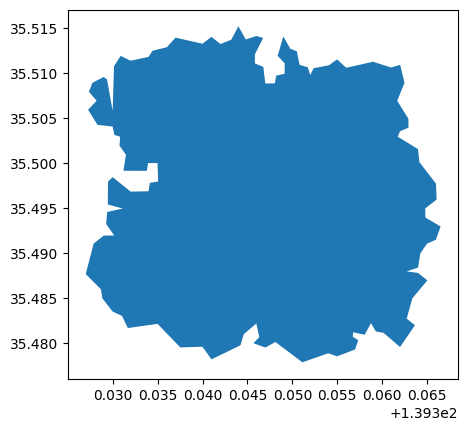

In [5]:
base = None
for area in KAIT_BUS_STOPS_WALKING_AREAS:
    gdf = geopandas.GeoDataFrame.from_features(area)
    if base is None:
        base = gdf
    else:
        base.union(gdf)
base.plot()

In [30]:
import folium
from lib.geometry import Geometry

KAIT_GEO = Geometry(type="", long=139.3399782, lat=35.4861002)

area_10min = []
area_20min = []
area_30min = []
for area in KAIT_BUS_STOPS_WALKING_AREAS:
    gdf = geopandas.GeoDataFrame.from_features(area)
    area_10min.append(gdf.geometry[2])
    area_20min.append(gdf.geometry[1])
    area_30min.append(gdf.geometry[0])
area_10min_polygon = geopandas.GeoSeries(unary_union(area_10min))
area_20min_polygon = geopandas.GeoSeries(unary_union(area_20min))
area_30min_polygon = geopandas.GeoSeries(unary_union(area_30min))

# 地図作成
f = folium.Figure(width=600, height=400)
folium_map = folium.Map(
    location=KAIT_GEO.folium_coordinate(),
    zoom_start=14,
    tiles="https://cyberjapandata.gsi.go.jp/xyz/std/{z}/{x}/{y}.png",
    attr="出典: 国土地理院ウェブサイト・地理院タイル・標準地図"
).add_to(f)

folium.GeoJson(
    area_10min_polygon.to_json(),
).add_to(folium_map)
folium.GeoJson(
    area_20min_polygon.to_json(),
).add_to(folium_map)
folium.GeoJson(
    area_30min_polygon.to_json(),
).add_to(folium_map)

for kanagawa_bus_stop in KAIT_BUS_STOPS:
    if kanagawa_bus_stop.name in ["神奈川工科大学", "神奈川工科大学前"]:
        folium.Marker(location=kanagawa_bus_stop.geometry.folium_coordinate(), icon=folium.Icon(color='red', prefix="fa", icon="school")).add_to(folium_map)
    else:
        folium.Marker(location=kanagawa_bus_stop.geometry.folium_coordinate(), icon=folium.Icon(color='blue', prefix="fa", icon="bus")).add_to(folium_map)

folium_map